In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

#Reading the data from csv
rawdata_read= pd.read_csv('telecom_churn_data.csv', sep=',', encoding='ISO-8859-1')
rawdata_read.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0.0,1.0,1.0,1.0,NaN,968.0,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0.0,NaN,1.0,1.0,NaN,1006.0,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0.0,NaN,NaN,NaN,1.0,1103.0,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0.0,NaN,NaN,NaN,NaN,2491.0,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.0,0.0,NaN,NaN,NaN,1526.0,0.0,0.0,0.00,0.00


In [ ]:
#Get columns in the dataframe
rawdata_read.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [ ]:
#Rename Columns
rawdata_read.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [ ]:
#Lets get the distribution of numeric data all the columns. 
rawdata_read.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,9.271700e+04,92717.0,91768.0,91768.0,91768.0,92717.000000,92717.000000,92717.000000,92717.000000,89073.000000,...,92716.000000,23374.000000,23737.000000,24446.000000,24103.000000,92716.000000,92716.000000,92716.000000,92716.000000,92716.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.487609,278.034024,278.940579,261.496229,132.207483,...,0.085217,0.914435,0.909298,0.891557,0.861428,1220.758887,68.553724,66.866021,60.148120,3.314242
std,6.955922e+05,0.0,0.0,0.0,0.0,326.101489,338.138176,340.702504,340.093949,296.360230,...,0.659584,0.279727,0.287191,0.310946,0.345506,954.571426,268.890046,269.380191,254.166263,32.294956
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.570000,87.100000,84.096000,62.985000,7.340000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001204e+09,109.0,0.0,0.0,0.0,197.696000,191.456000,192.405000,177.127000,34.330000,...,0.000000,1.000000,1.000000,1.000000,1.000000,866.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001811e+09,109.0,0.0,0.0,0.0,370.752000,365.171000,369.459000,353.401000,118.830000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1809.000000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,8716.150000,11166.210000,2618.570000


In [ ]:
#Get the null % of all the columns
print('\n Null % \n',round(100*(rawdata_read.isnull().sum()/len(rawdata_read.index)), 2))


 Null % 
 mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
vbc_3g_8          0.00
vbc_3g_7          0.00
vbc_3g_6          0.00
vbc_3g_9          0.00
Length: 226, dtype: float64


In [ ]:
rawdata_read[['av_rech_amt_data_6','av_rech_amt_data_7']].head(10)

,av_rech_amt_data_6,av_rech_amt_data_7
0,252.0,252.0
1,NaN,154.0
2,NaN,NaN
3,NaN,NaN
4,56.0,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,177.0
9,NaN,154.0


In [ ]:
rawdata_read[['total_rech_data_6','total_rech_data_7']].head(10)

,total_rech_data_6,total_rech_data_7
0,1.0,1.0
1,NaN,1.0
2,NaN,NaN
3,NaN,NaN
4,1.0,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,2.0
9,NaN,1.0


In [ ]:
#Fill missing values to filter high value customers
rawdata_read[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']]=rawdata_read[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].fillna(0, axis=1)

In [ ]:
#Get the top 30% customers based on the sum of recharges in month 6 and 7
high_value_cust=rawdata_read[rawdata_read[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)> rawdata_read[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1).quantile(0.7)]

In [ ]:
#Unnderstand the no of datapoints, column and column types
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27807 entries, 0 to 92707
Columns: 226 entries, mobile_number to vbc_3g_9
dtypes: float64(212), int64(2), object(12)
memory usage: 48.2+ MB


In [ ]:
#Getting the string columns in the data frame
str_cols = high_value_cust.select_dtypes(['object'])
#Stripping the leading and trailing whitespaces from the data set
high_value_cust[str_cols.columns]=str_cols.apply(lambda x: x.str.strip())

In [ ]:
#Converting all the string columns to upper case in the Data set
high_value_cust[str_cols.columns]=str_cols.apply(lambda x: x.str.upper())

In [ ]:
#Getting the no of unique mobile numbers, this is an id column
len(high_value_cust['mobile_number'].unique())

27807

In [ ]:
#setting the option to display a maximum of 250 rows
pd.set_option("display.max_rows",250)

In [ ]:
#Get null% of all columns
round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.76
std_og_t2o_mou               0.76
loc_ic_t2o_mou               0.76
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
last_date_of_month_9         1.17
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.67
onnet_mou_7                  1.64
onnet_mou_8                  3.60
onnet_mou_9                  6.04
offnet_mou_6                 1.67
offnet_mou_7                 1.64
offnet_mou_8                 3.60
offnet_mou_9                 6.04
roam_ic_mou_6                1.67
roam_ic_mou_7                1.64
roam_ic_mou_8                3.60
roam_ic_mou_9                6.04
roam_og_mou_6                1.67
roam_og_mou_7                1.64
roam_og_mou_8                3.60
roam_og_mou_9                6.04
loc_og_t2t_mou

In [ ]:
#Identify churn based on the criteria that the usage of 'vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9' should be 0
high_value_cust['churn']=high_value_cust[['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) & (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [ ]:
#Get only the data where the customers churned
churned_total = high_value_cust[high_value_cust['churn']==1]

In [ ]:
#No of churned datapoints
len(churned_total)

2266

In [ ]:
#No of non churned customers
len(high_value_cust[high_value_cust['churn']==0])

25541

In [ ]:
#Get the null % of columns where the customers churned
print('\n Null % \n',round(100*(churned_total.isnull().sum()/len(churned_total.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               3.97
std_og_t2o_mou               3.97
loc_ic_t2o_mou               3.97
last_date_of_month_6         0.00
last_date_of_month_7         1.24
last_date_of_month_8         6.35
last_date_of_month_9        14.39
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  6.27
onnet_mou_7                  8.30
onnet_mou_8                 30.45
onnet_mou_9                 64.43
offnet_mou_6                 6.27
offnet_mou_7                 8.30
offnet_mou_8                30.45
offnet_mou_9                64.43
roam_ic_mou_6                6.27
roam_ic_mou_7                8.30
roam_ic_mou_8               30.45
roam_ic_mou_9               64.43
roam_og_mou_6                6.27
roam_og_mou_7                8.30
roam_og_mou_8               30.45
roam_og_mou_9               64.43
loc

In [ ]:
#Get the data of all the rows with null values in more than 40 columns
high_value_cust[high_value_cust.isnull().sum(axis=1)>=40]


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,NaN,968.0,30.40,0.00,101.20,3.58,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802.0,57.74,19.38,18.74,0.00,1
67,7000800341,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,NaN,218.818,...,1.0,1.0,NaN,NaN,1158.0,126.21,745.73,1010.15,0.00,1
77,7001328263,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,30.000,...,NaN,1.0,NaN,NaN,1894.0,0.00,0.00,0.00,0.00,0
111,7001300706,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,596.301,...,1.0,NaN,NaN,NaN,332.0,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92565,7001353076,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1359.723,...,NaN,NaN,NaN,NaN,351.0,0.00,0.00,0.00,0.00,1
92571,7001455003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,313.682,...,NaN,NaN,0.0,NaN,2525.0,0.00,0.00,0.00,0.00,1
92670,7002240034,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,499.803,...,NaN,1.0,NaN,NaN,1522.0,0.00,1024.37,480.70,0.00,1
92680,7000786434,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,424.864,...,NaN,NaN,NaN,NaN,630.0,0.00,0.00,0.00,0.00,1


In [ ]:
#Lets see which columns are null when 'date_of_last_rech_data_6' are null
high_value_cust[high_value_cust.isnull().sum(axis=1)>=40].columns[high_value_cust[pd.isnull(high_value_cust['date_of_last_rech_data_6'])].isna().all()].tolist()

['date_of_last_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'fb_user_6']

In [ ]:
#Lets see which columns are null when 'date_of_last_rech_data_7' are null
high_value_cust[high_value_cust.isnull().sum(axis=1)>=40].columns[high_value_cust[pd.isnull(high_value_cust['date_of_last_rech_data_7'])].isna().all()].tolist()

['date_of_last_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'fb_user_7']

In [ ]:
#The last date of month columns are having null values and the columns have same value for each month respectively so they cn be easily imputed
high_value_cust['last_date_of_month_6'] = high_value_cust['last_date_of_month_6'].fillna('6/30/2014')
high_value_cust['last_date_of_month_7'] = high_value_cust['last_date_of_month_7'].fillna('7/31/2014')
high_value_cust['last_date_of_month_8'] = high_value_cust['last_date_of_month_8'].fillna('8/31/2014')


In [ ]:
#Recheck the null percentage
print('\n Null % \n',round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.76
std_og_t2o_mou               0.76
loc_ic_t2o_mou               0.76
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         1.17
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.67
onnet_mou_7                  1.64
onnet_mou_8                  3.60
onnet_mou_9                  6.04
offnet_mou_6                 1.67
offnet_mou_7                 1.64
offnet_mou_8                 3.60
offnet_mou_9                 6.04
roam_ic_mou_6                1.67
roam_ic_mou_7                1.64
roam_ic_mou_8                3.60
roam_ic_mou_9                6.04
roam_og_mou_6                1.67
roam_og_mou_7                1.64
roam_og_mou_8                3.60
roam_og_mou_9                6.04
loc

In [ ]:
#Convert the date columns from string to date type
dateColumns = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
high_value_cust[dateColumns]=high_value_cust[dateColumns].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))
high_value_cust[dateColumns]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-30,2014-07-31,2014-08-31,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
8,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
16,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-14,NaT,NaT,NaT
21,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...
92685,2014-06-30,2014-07-31,2014-08-31,2014-06-26,2014-07-31,2014-08-24,2014-06-26,2014-07-31,2014-08-23
92687,2014-06-30,2014-07-31,2014-08-31,2014-06-29,2014-07-13,2014-08-25,NaT,NaT,NaT
92702,2014-06-30,2014-07-31,2014-08-31,2014-06-29,2014-07-31,2014-08-31,NaT,2014-07-14,2014-08-24
92703,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-30,2014-06-16,2014-07-17,2014-08-15


In [ ]:
#Transform the existing date of last recharge columns with 1 indicating a recharge and 0 indicating no recharge
dateColumnsToTransform = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]] = high_value_cust[dateColumnsToTransform].applymap(lambda x: -1 if pd.isnull(x) else 1)


In [ ]:
#Convert the features to category
high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]] = high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8']].apply(lambda x: x.astype('category'))

In [ ]:
#Lets look at the columns we created
high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]]

,rech_amt_6,rech_amt_7,rech_amt_8,rech_data_6,rech_data_7,rech_data_8
0,1,1,1,1,1,1
7,1,1,1,-1,-1,-1
8,1,1,1,-1,1,1
16,1,1,1,-1,-1,-1
21,1,1,1,-1,-1,-1
...,...,...,...,...,...,...
92685,1,1,1,1,1,1
92687,1,1,1,-1,-1,-1
92702,1,1,1,-1,1,1
92703,1,1,1,1,1,1


In [ ]:
#Lets re check the null percentage
print('\n Null % \n',round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.76
std_og_t2o_mou               0.76
loc_ic_t2o_mou               0.76
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         1.17
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.67
onnet_mou_7                  1.64
onnet_mou_8                  3.60
onnet_mou_9                  6.04
offnet_mou_6                 1.67
offnet_mou_7                 1.64
offnet_mou_8                 3.60
offnet_mou_9                 6.04
roam_ic_mou_6                1.67
roam_ic_mou_7                1.64
roam_ic_mou_8                3.60
roam_ic_mou_9                6.04
roam_og_mou_6                1.67
roam_og_mou_7                1.64
roam_og_mou_8                3.60
roam_og_mou_9                6.04
loc

In [ ]:
#Get the info of the dateframe
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27807 entries, 0 to 92707
Columns: 233 entries, mobile_number to rech_data_8
dtypes: category(6), datetime64[ns](9), float64(212), int64(3), object(3)
memory usage: 48.5+ MB


In [ ]:
#Lets get the info of all columns
high_value_cust.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,churn
count,2.780700e+04,27807.0,27596.0,27596.0,27596.0,27807.000000,27807.000000,27807.000000,27807.000000,27342.000000,...,13824.000000,14059.000000,13407.000000,12937.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000
mean,7.001216e+09,109.0,0.0,0.0,0.0,574.806770,577.104683,524.050335,480.540894,280.584535,...,0.920501,0.914574,0.880883,0.877329,1245.206890,165.236732,173.675814,154.318647,7.505856,0.081490
std,6.867803e+05,0.0,0.0,0.0,0.0,444.634955,470.090160,487.722229,494.627712,461.796009,...,0.270526,0.279524,0.323938,0.328072,970.723089,421.351134,440.825425,416.776828,50.554832,0.273591
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000632e+09,109.0,0.0,0.0,0.0,345.374000,347.133500,266.386500,219.478000,28.795000,...,1.000000,1.000000,1.000000,1.000000,469.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001222e+09,109.0,0.0,0.0,0.0,489.368000,488.114000,443.376000,404.114000,106.935000,...,1.000000,1.000000,1.000000,1.000000,887.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001805e+09,109.0,0.0,0.0,0.0,700.077000,698.828000,666.147500,632.222500,325.375000,...,1.000000,1.000000,1.000000,1.000000,1866.000000,107.020000,109.215000,75.665000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,1.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,8716.150000,11166.210000,2618.570000,1.000000


In [ ]:
#Get all the null columns
null_cols=high_value_cust.columns[high_value_cust.isna().any()].tolist()

In [ ]:
#Date columns to list
datecols=['date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_9',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_data_9',
'last_date_of_month_9']

In [ ]:
#Get numerical columns to explore
cols_explore  = [x for x in null_cols if x not in datecols]

[Text(0, 0, 'loc_og_t2o_mou'),
 Text(0, 0, 'std_og_t2o_mou'),
 Text(0, 0, 'loc_ic_t2o_mou'),
 Text(0, 0, 'onnet_mou_6'),
 Text(0, 0, 'onnet_mou_7'),
 Text(0, 0, 'onnet_mou_8'),
 Text(0, 0, 'onnet_mou_9'),
 Text(0, 0, 'offnet_mou_6'),
 Text(0, 0, 'offnet_mou_7'),
 Text(0, 0, 'offnet_mou_8'),
 Text(0, 0, 'offnet_mou_9'),
 Text(0, 0, 'roam_ic_mou_6'),
 Text(0, 0, 'roam_ic_mou_7'),
 Text(0, 0, 'roam_ic_mou_8'),
 Text(0, 0, 'roam_ic_mou_9'),
 Text(0, 0, 'roam_og_mou_6'),
 Text(0, 0, 'roam_og_mou_7'),
 Text(0, 0, 'roam_og_mou_8'),
 Text(0, 0, 'roam_og_mou_9'),
 Text(0, 0, 'loc_og_t2t_mou_6')]

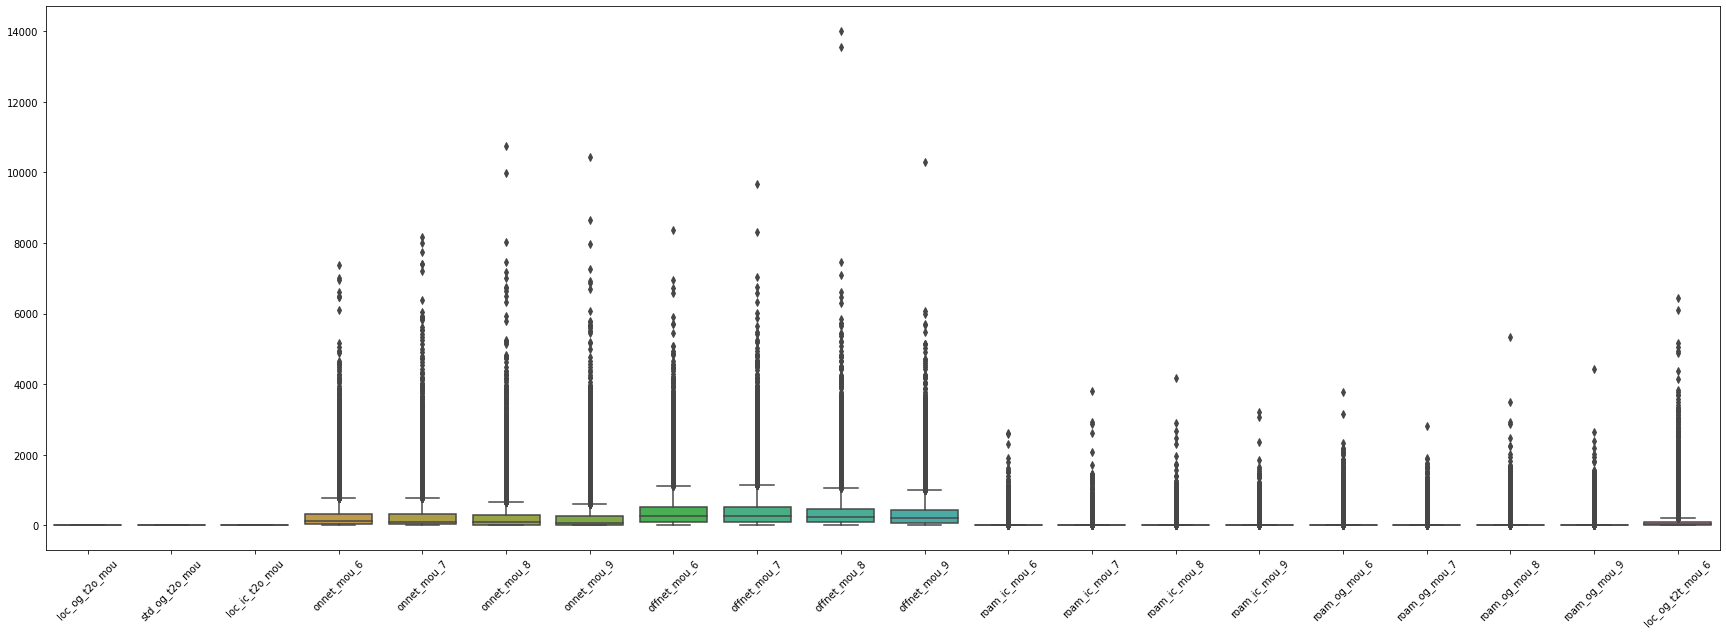

In [ ]:


plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[:20]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'loc_og_t2t_mou_7'),
 Text(0, 0, 'loc_og_t2t_mou_8'),
 Text(0, 0, 'loc_og_t2t_mou_9'),
 Text(0, 0, 'loc_og_t2m_mou_6'),
 Text(0, 0, 'loc_og_t2m_mou_7'),
 Text(0, 0, 'loc_og_t2m_mou_8'),
 Text(0, 0, 'loc_og_t2m_mou_9'),
 Text(0, 0, 'loc_og_t2f_mou_6'),
 Text(0, 0, 'loc_og_t2f_mou_7'),
 Text(0, 0, 'loc_og_t2f_mou_8'),
 Text(0, 0, 'loc_og_t2f_mou_9'),
 Text(0, 0, 'loc_og_t2c_mou_6'),
 Text(0, 0, 'loc_og_t2c_mou_7'),
 Text(0, 0, 'loc_og_t2c_mou_8'),
 Text(0, 0, 'loc_og_t2c_mou_9'),
 Text(0, 0, 'loc_og_mou_6'),
 Text(0, 0, 'loc_og_mou_7'),
 Text(0, 0, 'loc_og_mou_8'),
 Text(0, 0, 'loc_og_mou_9'),
 Text(0, 0, 'std_og_t2t_mou_6')]

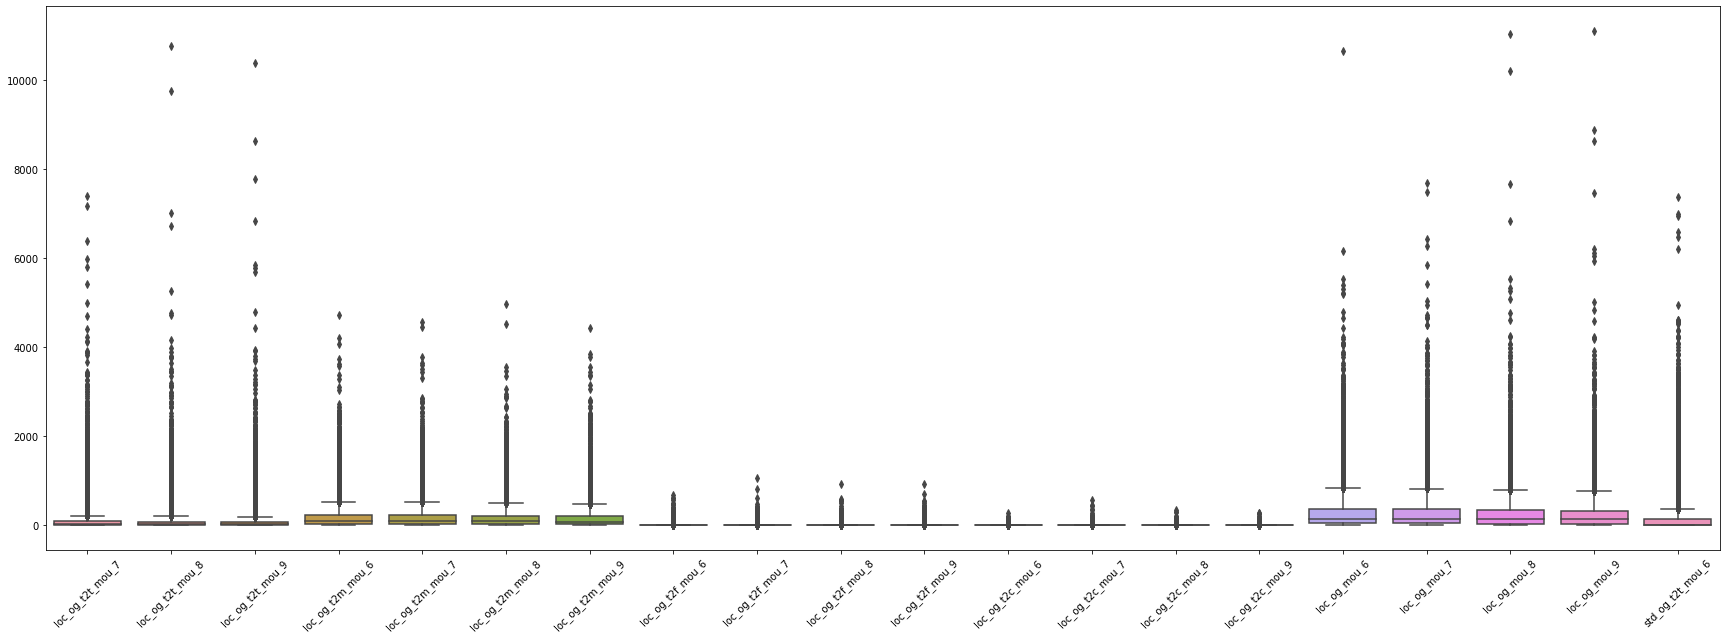

In [ ]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[20:40]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'std_og_t2t_mou_7'),
 Text(0, 0, 'std_og_t2t_mou_8'),
 Text(0, 0, 'std_og_t2t_mou_9'),
 Text(0, 0, 'std_og_t2m_mou_6'),
 Text(0, 0, 'std_og_t2m_mou_7'),
 Text(0, 0, 'std_og_t2m_mou_8'),
 Text(0, 0, 'std_og_t2m_mou_9'),
 Text(0, 0, 'std_og_t2f_mou_6'),
 Text(0, 0, 'std_og_t2f_mou_7'),
 Text(0, 0, 'std_og_t2f_mou_8'),
 Text(0, 0, 'std_og_t2f_mou_9'),
 Text(0, 0, 'std_og_t2c_mou_6'),
 Text(0, 0, 'std_og_t2c_mou_7'),
 Text(0, 0, 'std_og_t2c_mou_8'),
 Text(0, 0, 'std_og_t2c_mou_9'),
 Text(0, 0, 'std_og_mou_6'),
 Text(0, 0, 'std_og_mou_7'),
 Text(0, 0, 'std_og_mou_8'),
 Text(0, 0, 'std_og_mou_9'),
 Text(0, 0, 'isd_og_mou_6')]

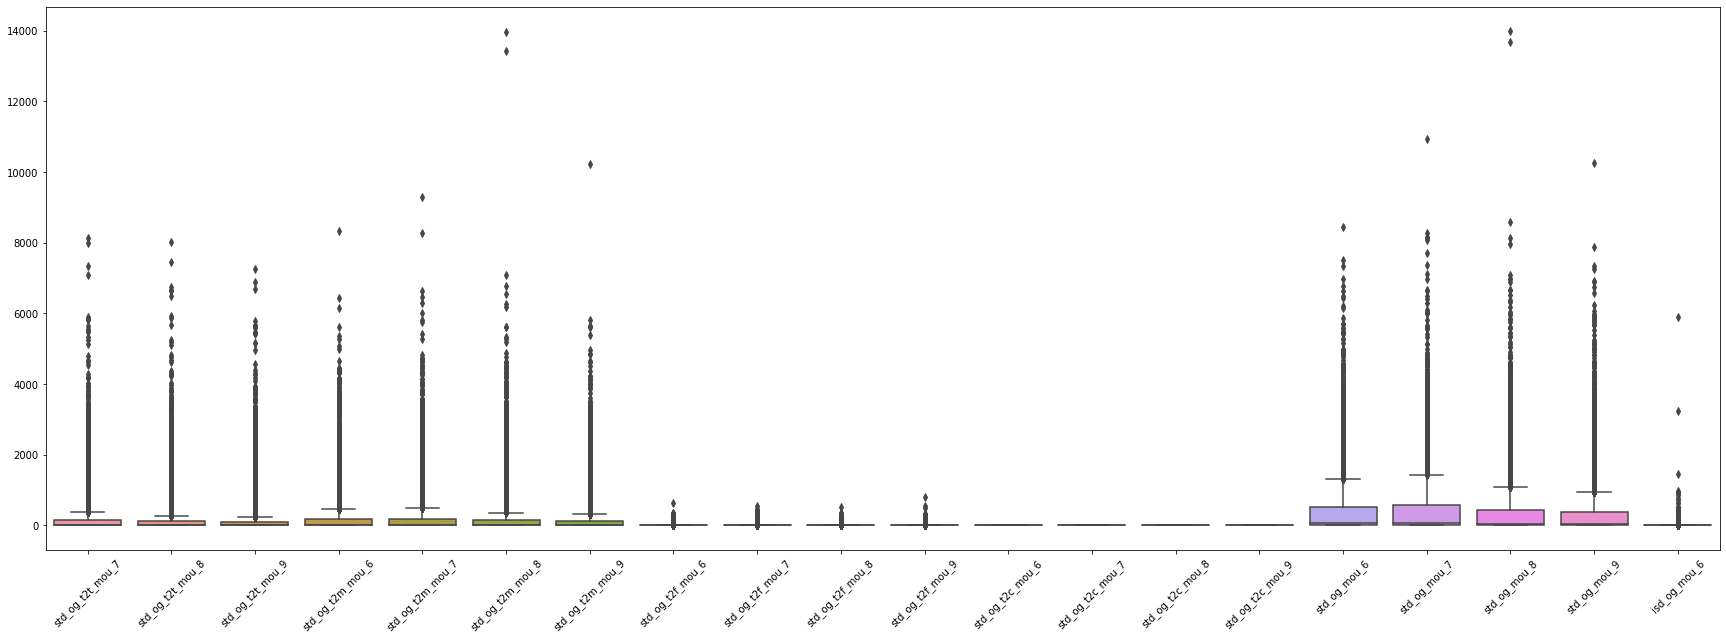

In [ ]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[40:60]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'isd_og_mou_7'),
 Text(0, 0, 'isd_og_mou_8'),
 Text(0, 0, 'isd_og_mou_9'),
 Text(0, 0, 'spl_og_mou_6'),
 Text(0, 0, 'spl_og_mou_7'),
 Text(0, 0, 'spl_og_mou_8'),
 Text(0, 0, 'spl_og_mou_9'),
 Text(0, 0, 'og_others_6'),
 Text(0, 0, 'og_others_7'),
 Text(0, 0, 'og_others_8'),
 Text(0, 0, 'og_others_9'),
 Text(0, 0, 'loc_ic_t2t_mou_6'),
 Text(0, 0, 'loc_ic_t2t_mou_7'),
 Text(0, 0, 'loc_ic_t2t_mou_8'),
 Text(0, 0, 'loc_ic_t2t_mou_9'),
 Text(0, 0, 'loc_ic_t2m_mou_6'),
 Text(0, 0, 'loc_ic_t2m_mou_7'),
 Text(0, 0, 'loc_ic_t2m_mou_8'),
 Text(0, 0, 'loc_ic_t2m_mou_9'),
 Text(0, 0, 'loc_ic_t2f_mou_6')]

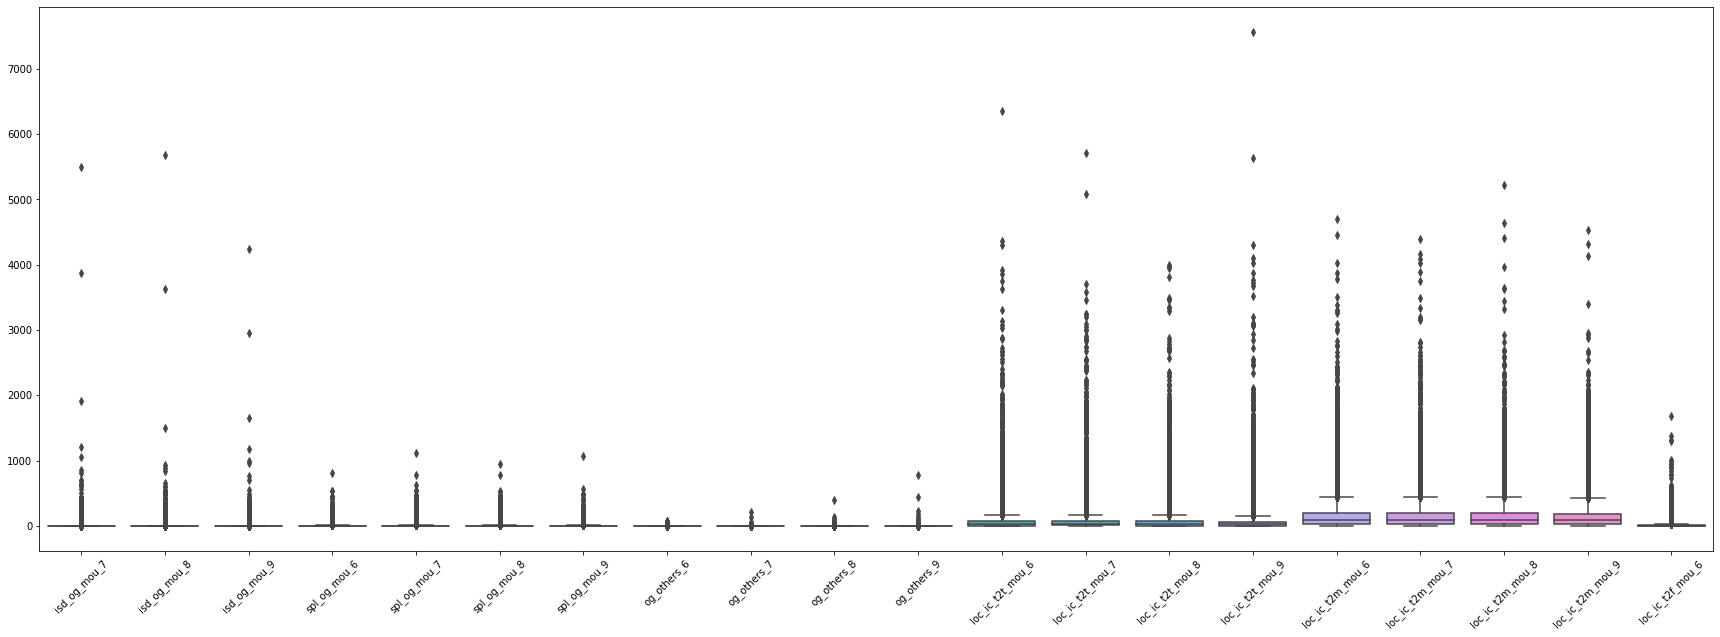

In [ ]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[60:80]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'loc_ic_t2f_mou_7'),
 Text(0, 0, 'loc_ic_t2f_mou_8'),
 Text(0, 0, 'loc_ic_t2f_mou_9'),
 Text(0, 0, 'loc_ic_mou_6'),
 Text(0, 0, 'loc_ic_mou_7'),
 Text(0, 0, 'loc_ic_mou_8'),
 Text(0, 0, 'loc_ic_mou_9'),
 Text(0, 0, 'std_ic_t2t_mou_6'),
 Text(0, 0, 'std_ic_t2t_mou_7'),
 Text(0, 0, 'std_ic_t2t_mou_8'),
 Text(0, 0, 'std_ic_t2t_mou_9'),
 Text(0, 0, 'std_ic_t2m_mou_6'),
 Text(0, 0, 'std_ic_t2m_mou_7'),
 Text(0, 0, 'std_ic_t2m_mou_8'),
 Text(0, 0, 'std_ic_t2m_mou_9'),
 Text(0, 0, 'std_ic_t2f_mou_6'),
 Text(0, 0, 'std_ic_t2f_mou_7'),
 Text(0, 0, 'std_ic_t2f_mou_8'),
 Text(0, 0, 'std_ic_t2f_mou_9'),
 Text(0, 0, 'std_ic_t2o_mou_6')]

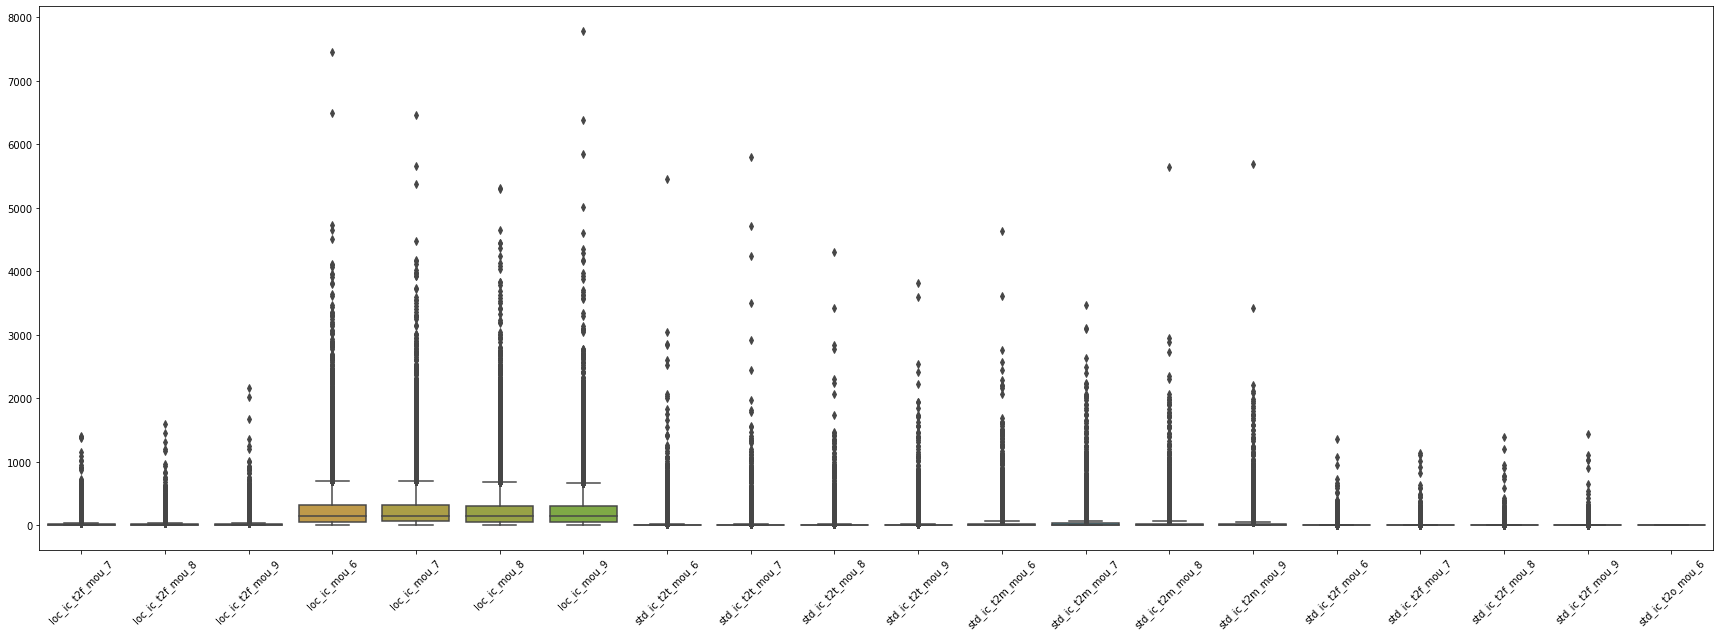

In [ ]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[80:100]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'std_ic_t2o_mou_7'),
 Text(0, 0, 'std_ic_t2o_mou_8'),
 Text(0, 0, 'std_ic_t2o_mou_9'),
 Text(0, 0, 'std_ic_mou_6'),
 Text(0, 0, 'std_ic_mou_7'),
 Text(0, 0, 'std_ic_mou_8'),
 Text(0, 0, 'std_ic_mou_9'),
 Text(0, 0, 'spl_ic_mou_6'),
 Text(0, 0, 'spl_ic_mou_7'),
 Text(0, 0, 'spl_ic_mou_8'),
 Text(0, 0, 'spl_ic_mou_9'),
 Text(0, 0, 'isd_ic_mou_6'),
 Text(0, 0, 'isd_ic_mou_7'),
 Text(0, 0, 'isd_ic_mou_8'),
 Text(0, 0, 'isd_ic_mou_9'),
 Text(0, 0, 'ic_others_6'),
 Text(0, 0, 'ic_others_7'),
 Text(0, 0, 'ic_others_8'),
 Text(0, 0, 'ic_others_9'),
 Text(0, 0, 'max_rech_data_6')]

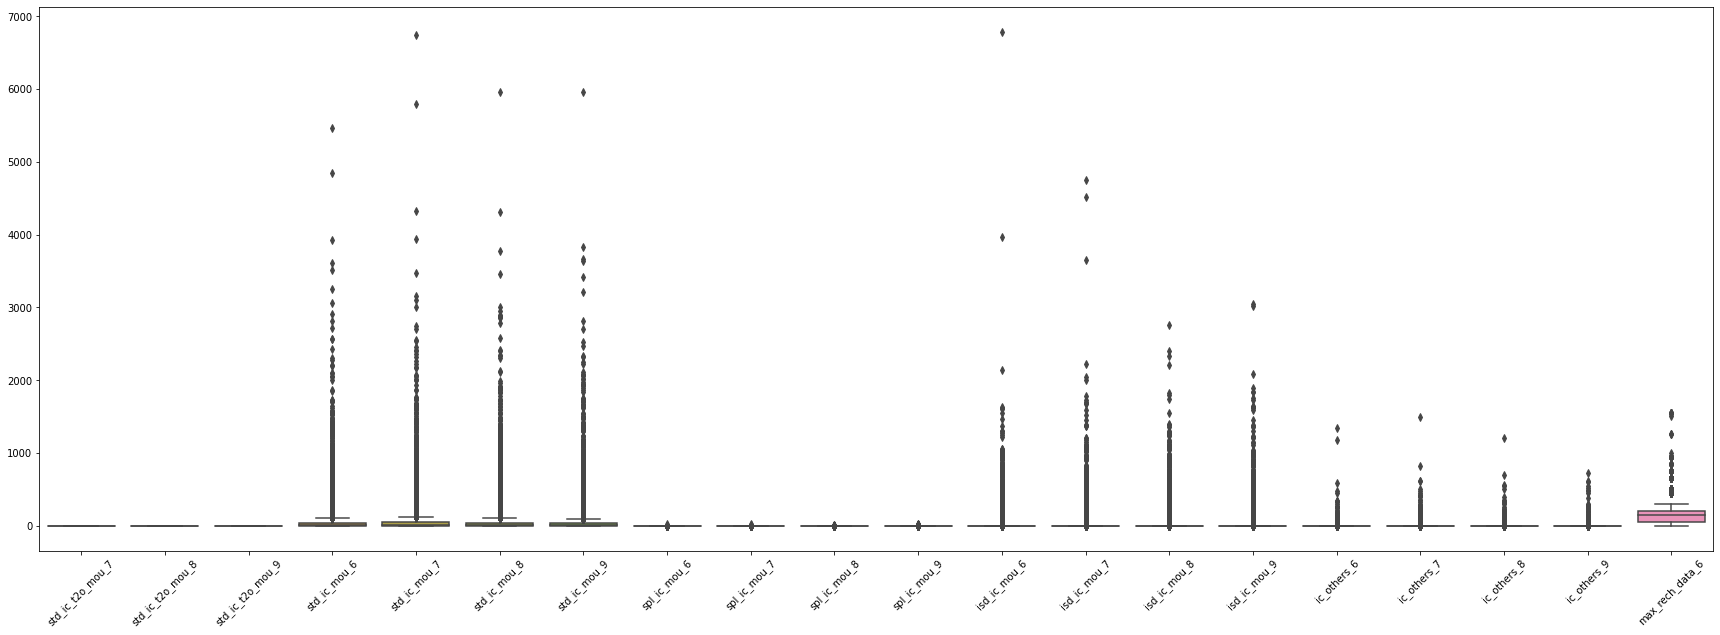

In [ ]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[100:120]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'max_rech_data_7'),
 Text(0, 0, 'max_rech_data_8'),
 Text(0, 0, 'max_rech_data_9'),
 Text(0, 0, 'count_rech_2g_6'),
 Text(0, 0, 'count_rech_2g_7'),
 Text(0, 0, 'count_rech_2g_8'),
 Text(0, 0, 'count_rech_2g_9'),
 Text(0, 0, 'count_rech_3g_6'),
 Text(0, 0, 'count_rech_3g_7'),
 Text(0, 0, 'count_rech_3g_8'),
 Text(0, 0, 'count_rech_3g_9'),
 Text(0, 0, 'arpu_3g_6'),
 Text(0, 0, 'arpu_3g_7'),
 Text(0, 0, 'arpu_3g_8'),
 Text(0, 0, 'arpu_3g_9'),
 Text(0, 0, 'arpu_2g_6'),
 Text(0, 0, 'arpu_2g_7'),
 Text(0, 0, 'arpu_2g_8'),
 Text(0, 0, 'arpu_2g_9'),
 Text(0, 0, 'night_pck_user_6')]

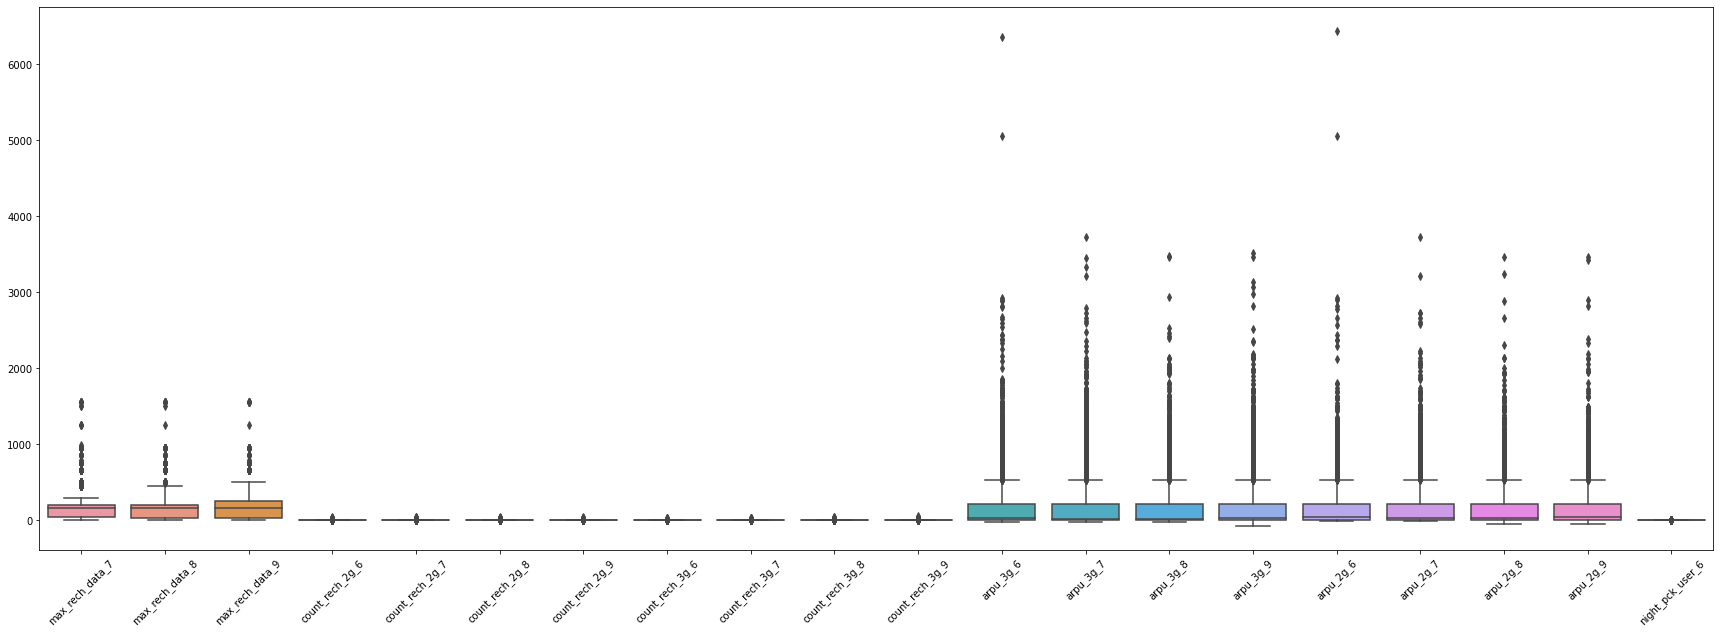

In [ ]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[120:140]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'night_pck_user_7'),
 Text(0, 0, 'night_pck_user_8'),
 Text(0, 0, 'night_pck_user_9'),
 Text(0, 0, 'fb_user_6'),
 Text(0, 0, 'fb_user_7'),
 Text(0, 0, 'fb_user_8'),
 Text(0, 0, 'fb_user_9')]

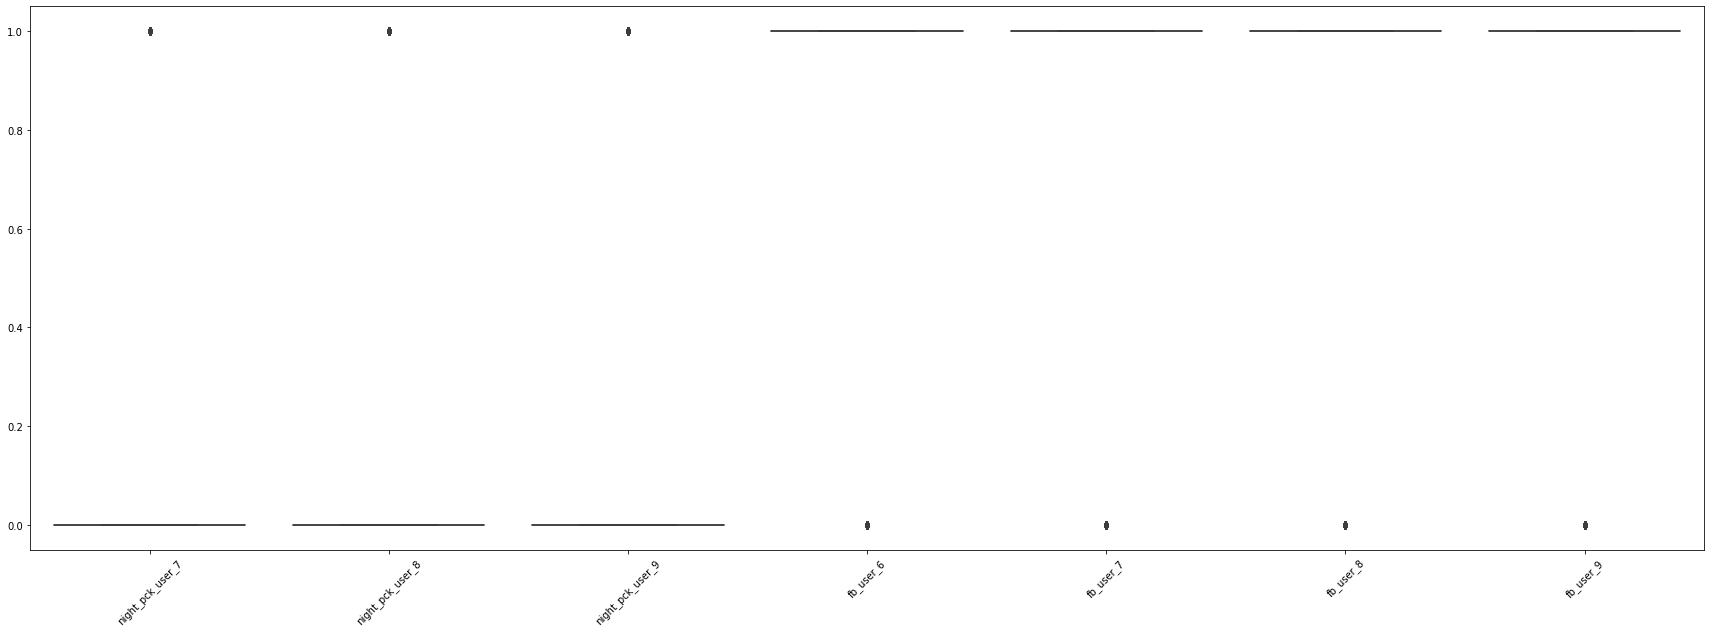

In [ ]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[140:160]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [ ]:
high_value_cust.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,churn
count,2.780700e+04,27807.0,27596.0,27596.0,27596.0,27807.000000,27807.000000,27807.000000,27807.000000,27342.000000,...,13824.000000,14059.000000,13407.000000,12937.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000
mean,7.001216e+09,109.0,0.0,0.0,0.0,574.806770,577.104683,524.050335,480.540894,280.584535,...,0.920501,0.914574,0.880883,0.877329,1245.206890,165.236732,173.675814,154.318647,7.505856,0.081490
std,6.867803e+05,0.0,0.0,0.0,0.0,444.634955,470.090160,487.722229,494.627712,461.796009,...,0.270526,0.279524,0.323938,0.328072,970.723089,421.351134,440.825425,416.776828,50.554832,0.273591
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000632e+09,109.0,0.0,0.0,0.0,345.374000,347.133500,266.386500,219.478000,28.795000,...,1.000000,1.000000,1.000000,1.000000,469.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001222e+09,109.0,0.0,0.0,0.0,489.368000,488.114000,443.376000,404.114000,106.935000,...,1.000000,1.000000,1.000000,1.000000,887.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001805e+09,109.0,0.0,0.0,0.0,700.077000,698.828000,666.147500,632.222500,325.375000,...,1.000000,1.000000,1.000000,1.000000,1866.000000,107.020000,109.215000,75.665000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,1.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,8716.150000,11166.210000,2618.570000,1.000000


In [ ]:
#Get all float columns
high_value_cust.select_dtypes(include=['float64']).columns.tolist()

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [ ]:
#Get all int columns
high_value_cust.select_dtypes(include=['int64']).columns.tolist()

['mobile_number', 'circle_id', 'churn']

In [ ]:
#Get all int columns
high_value_cust.select_dtypes(include=['object']).columns.tolist()

['last_date_of_month_9', 'date_of_last_rech_9', 'date_of_last_rech_data_9']

In [ ]:
#Get all data columns to impute
columnstoImpute = ['total_rech_data_6'           
,'total_rech_data_7'           
,'total_rech_data_8'           
,'total_rech_data_9'
,'max_rech_data_6'             
,'max_rech_data_7'             
,'max_rech_data_8'             
,'max_rech_data_9'             
,'count_rech_2g_6'             
,'count_rech_2g_7'             
,'count_rech_2g_8'            
,'count_rech_2g_9'             
,'count_rech_3g_6'             
,'count_rech_3g_7'             
,'count_rech_3g_8'             
,'count_rech_3g_9'             
,'av_rech_amt_data_6'          
,'av_rech_amt_data_7'          
,'av_rech_amt_data_8'          
,'av_rech_amt_data_9'          
,'arpu_3g_6'                   
,'arpu_3g_7'                   
,'arpu_3g_8'                   
,'arpu_3g_9'                   
,'arpu_2g_6'                   
,'arpu_2g_7'                   
,'arpu_2g_8'                  
,'arpu_2g_9']

In [ ]:
#Impute the null values with 0 for all data columns
high_value_cust[columnstoImpute] = high_value_cust[columnstoImpute].fillna(0, axis=1)

In [ ]:
#Recheck the null percentage
print('\n Null % \n',round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.76
std_og_t2o_mou               0.76
loc_ic_t2o_mou               0.76
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         1.17
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.67
onnet_mou_7                  1.64
onnet_mou_8                  3.60
onnet_mou_9                  6.04
offnet_mou_6                 1.67
offnet_mou_7                 1.64
offnet_mou_8                 3.60
offnet_mou_9                 6.04
roam_ic_mou_6                1.67
roam_ic_mou_7                1.64
roam_ic_mou_8                3.60
roam_ic_mou_9                6.04
roam_og_mou_6                1.67
roam_og_mou_7                1.64
roam_og_mou_8                3.60
roam_og_mou_9                6.04
loc

In [ ]:
#Impute the missing values and convert the features to category
high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]]=high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].applymap(lambda x: -1 if pd.isnull(x) else 1)
high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]] = high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].apply(lambda x: x.astype('category'))

In [ ]:
high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,1,1,1,1,1,1
7,-1,-1,-1,-1,-1,-1
8,-1,1,1,-1,1,1
16,-1,-1,-1,-1,-1,-1
21,-1,-1,-1,-1,-1,-1


In [ ]:
#Get all the data when loc_og_t20_mou are nulls
high_value_cust[pd.isnull(high_value_cust['loc_og_t2o_mou'])]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,vbc_3g_7,vbc_3g_6,vbc_3g_9,churn,rech_amt_6,rech_amt_7,rech_amt_8,rech_data_6,rech_data_7,rech_data_8
687,7001662284,109,NaN,NaN,NaN,2014-06-30,2014-07-31,2014-08-31,9/30/2014,427.627,...,0.00,145.24,0.00,1,1,1,-1,1,-1,-1
2185,7000237332,109,NaN,NaN,NaN,2014-06-30,2014-07-31,2014-08-31,9/30/2014,386.514,...,657.55,9.22,0.00,0,1,1,1,1,1,1
3154,7000606599,109,NaN,NaN,NaN,2014-06-30,2014-07-31,2014-08-31,9/30/2014,260.902,...,7.68,16.26,0.00,0,1,1,1,1,1,1
3506,7002324263,109,NaN,NaN,NaN,2014-06-30,2014-07-31,2014-08-31,NaN,996.558,...,0.00,0.00,0.00,1,1,-1,-1,-1,-1,-1
3677,7001016201,109,NaN,NaN,NaN,2014-06-30,2014-07-31,2014-08-31,9/30/2014,386.505,...,0.00,0.00,0.00,0,1,1,1,1,-1,-1
4024,7000102255,109,NaN,NaN,NaN,2014-06-30,2014-07-31,2014-08-31,9/30/2014,3.500,...,0.00,37.78,0.00,1,1,1,1,-1,1,-1
4190,7000293582,109,NaN,NaN,NaN,2014-06-30,2014-07-31,2014-08-31,NaN,2502.516,...,0.00,303.54,0.00,1,1,-1,-1,-1,-1,-1
5175,7002074759,109,NaN,NaN,NaN,2014-06-30,2014-07-31,2014-08-31,9/30/2014,4.980,...,0.00,0.00,0.00,1,1,1,1,-1,1,-1
5220,7000635396,109,NaN,NaN,NaN,2014-06-30,2014-07-31,2014-08-31,9/30/2014,427.619,...,0.00,0.00,0.00,0,1,1,1,1,1,1
5539,7001126462,109,NaN,NaN,NaN,2014-06-30,2014-07-31,2014-08-31,9/30/2014,249.000,...,0.00,0.00,0.00,1,1,1,1,-1,-1,-1


In [ ]:
#Impute 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou' columns with 0's
high_value_cust[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']] = high_value_cust[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].fillna(0, axis=1)

In [ ]:
#Recheck the null percentage
print('\n Null % \n',round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         1.17
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.67
onnet_mou_7                  1.64
onnet_mou_8                  3.60
onnet_mou_9                  6.04
offnet_mou_6                 1.67
offnet_mou_7                 1.64
offnet_mou_8                 3.60
offnet_mou_9                 6.04
roam_ic_mou_6                1.67
roam_ic_mou_7                1.64
roam_ic_mou_8                3.60
roam_ic_mou_9                6.04
roam_og_mou_6                1.67
roam_og_mou_7                1.64
roam_og_mou_8                3.60
roam_og_mou_9                6.04
loc

In [ ]:
pd.set_option("display.max_columns",300)

In [ ]:
#Get all the columns having null values when loc_og_t2c_mou_6 is having null value
high_value_cust[pd.isnull(high_value_cust['loc_og_t2c_mou_6'])].columns[high_value_cust[pd.isnull(high_value_cust['loc_og_t2c_mou_6'])].isna().all()].tolist()

['onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6']

In [ ]:
#Get all the columns having null values when loc_og_t2c_mou_7 is having null value
high_value_cust[pd.isnull(high_value_cust['loc_og_t2c_mou_7'])].columns[high_value_cust[pd.isnull(high_value_cust['loc_og_t2c_mou_7'])].isna().all()].tolist()

['onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7']

In [ ]:
#Get all the columns having null values when loc_og_t2c_mou_8 is having null value
high_value_cust[pd.isnull(high_value_cust['loc_og_t2c_mou_8'])].columns[high_value_cust[pd.isnull(high_value_cust['loc_og_t2c_mou_8'])].isna().all()].tolist()

['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8']

In [ ]:
#Lets check if any of the rows having all data or call columns with null values 
high_value_cust.drop(['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                     'last_date_of_month_9','rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8'], axis=1).isna().all()

loc_og_t2o_mou              False
std_og_t2o_mou              False
loc_ic_t2o_mou              False
arpu_6                      False
arpu_7                      False
arpu_8                      False
arpu_9                      False
onnet_mou_6                 False
onnet_mou_7                 False
onnet_mou_8                 False
onnet_mou_9                 False
offnet_mou_6                False
offnet_mou_7                False
offnet_mou_8                False
offnet_mou_9                False
roam_ic_mou_6               False
roam_ic_mou_7               False
roam_ic_mou_8               False
roam_ic_mou_9               False
roam_og_mou_6               False
roam_og_mou_7               False
roam_og_mou_8               False
roam_og_mou_9               False
loc_og_t2t_mou_6            False
loc_og_t2t_mou_7            False
loc_og_t2t_mou_8            False
loc_og_t2t_mou_9            False
loc_og_t2m_mou_6            False
loc_og_t2m_mou_7            False
loc_og_t2m_mou

In [ ]:
#Since none of the rows exist where all the date and call columns are having null values. So the null values are independent of data and calls and support our earlier assumption that the null values indicate no usage of service rather than having missing values and so can be imputed by zeros
#Get the info of the dataframe
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27807 entries, 0 to 92707
Columns: 233 entries, mobile_number to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(206), int64(3), object(3)
memory usage: 47.4+ MB


In [ ]:
#Exclude the date and category columns from the dataset and impute with 0
high_value_cust[high_value_cust.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = high_value_cust[high_value_cust.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [ ]:
#Recheck the null percentage
print('\n Null % \n',round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  0.00
onnet_mou_7                  0.00
onnet_mou_8                  0.00
onnet_mou_9                  0.00
offnet_mou_6                 0.00
offnet_mou_7                 0.00
offnet_mou_8                 0.00
offnet_mou_9                 0.00
roam_ic_mou_6                0.00
roam_ic_mou_7                0.00
roam_ic_mou_8                0.00
roam_ic_mou_9                0.00
roam_og_mou_6                0.00
roam_og_mou_7                0.00
roam_og_mou_8                0.00
roam_og_mou_9                0.00
loc

In [ ]:
#Get all the columns ending with 9. All the columns of month 9
month_9_cols = [col for col in high_value_cust.columns if '9' in col]
month_9_cols

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [ ]:
#Remove the month 9 columns since they are not necessary for prediction
high_value_cust = high_value_cust.drop(month_9_cols, axis=1)

In [ ]:
#Get the dataframe info
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27807 entries, 0 to 92707
Columns: 178 entries, mobile_number to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(154), int64(3)
memory usage: 35.7 MB


In [ ]:
#Get first few rows in the dataframe
high_value_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,rech_amt_6,rech_amt_7,rech_amt_8,rech_data_6,rech_data_7,rech_data_8
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,2014-06-21,2014-07-16,2014-08-08,252.0,252.0,252.0,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1,1,968.0,30.40,0.00,101.20,1,1,1,1,1,1,1
7,7000701601,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.

In [ ]:
#Get the mterics of all numeric columns
high_value_cust.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,2.780700e+04,27807.0,27807.0,27807.0,27807.0,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.00000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.0,27807.0,27807.0,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.0,27807.0,27807.0,27807.000000,27807.000000,27807.000000,27807.000000,27807.00000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.00000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.00000,27807.000000,27807.000000,

In [ ]:
#Drop the columns
high_value_cust = high_value_cust.drop(['mobile_number','circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                     'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6',
                     'std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1)

In [ ]:
#Get the info of the dataframe after dropiing columns
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27807 entries, 0 to 92707
Columns: 167 entries, last_date_of_month_6 to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(145), int64(1)
memory usage: 33.4 MB


In [ ]:
#Get the metrics of remaining columns
high_value_cust.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.00000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.00000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.00000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.00000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000,27807.000000
mean

In [ ]:
#Create a new dataframe
total_data = pd.DataFrame()

In [ ]:
#Get columns excluding date columns
cols = high_value_cust.select_dtypes(exclude=['datetime64[ns]','object','category']).columns.tolist()

In [ ]:
#Remove aon and churn columns
cols.remove('aon')
cols.remove('churn')

In [ ]:
#Create an empty list
sublist=[]

#Get the columns names removing last two characters
for col in cols:
    sublist.append(col[:-2])

In [ ]:
#Import ordered dict package
from collections import OrderedDict

#Get unique column names after removing last two characters into a list
collist=[]
collist=list(OrderedDict.fromkeys(sublist))
collist

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'vbc_3g']

In [ ]:
#Loop through all the unique features, append 6,7,8 and add the totals to the new dataframe
for col in collist:
    total_data['total_'+col] = high_value_cust[col+'_6']+high_value_cust[col+'_7']+high_value_cust[col+'_8']

In [ ]:
#Add back churn and aon columns to new dataframe
total_data['aon'] = high_value_cust['aon']
total_data['churn'] = high_value_cust['churn']

In [ ]:
#Get first few rows of new dataframe
total_data.head()

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
0,626.004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,9.0,866.0,756.0,756.0,3.0,756.0,0.0,3.0,756.0,37.20,343.94,636.51,636.51,0.0,0.0,3.0,0.0,131.60,968.0,1
7,5590.510,164.81,1346.50,81.36,74.39,123.05,918.29,170.50,0.00,1211.86,39.60,130.79,43.42,213.84,10.19,11.00,0.0,1446.93,117.71,560.24,293.15,971.15,79.11,359.76,108.64,547.56,1613.24,0.21,48.18,46.07,17.0,6008.0,3950.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,95.86,802.0,1
8,1008.306,799.80,311.77,0.00,0.00,527.21,202.08,0.00,7.15,729.31,272.57,99.42,0.00,372.02,0.00,10.23,0.0,1111.58,33.99,87.04,0.00,121.05,0.68,27.16,0.00,27.84,148.89,0.00,0.00,0.00,54.0,1158.0,274.0,60.0,5.0,177.0,5.0,0.0,246.0,356.03,762.89,19.83,0.00,1.0,4.0,0.0,0.0,1053.84,315.0,0
16,918.738,195.13,688.79,2.83,17.74,175.15,547.56,14.74,0.00,737.48,13.70,105.79,0.00,119.51,0.00,9.17,0.0,866.20,141.66,526.66,50.10,718.47,153.76,165.69,2.69,322.16,1040.88,0.00,0.23,0.00,18.0,1078.0,350.0,330.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,24.34,511.0,0
21,1749.966,319.66,2638.00,0.00,0.00,33.98,284.55,2.33,0.00,320.87,285.66,2351.09,0.00,2636.77,0.00,0.00,0.0,2957.67,32.21,322.02,17.84,372.12,20.22,207.66,0.00,227.90,600.02,0.00,0.00,0.00,75.0,1998.0,150.0,100.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,720.0,0


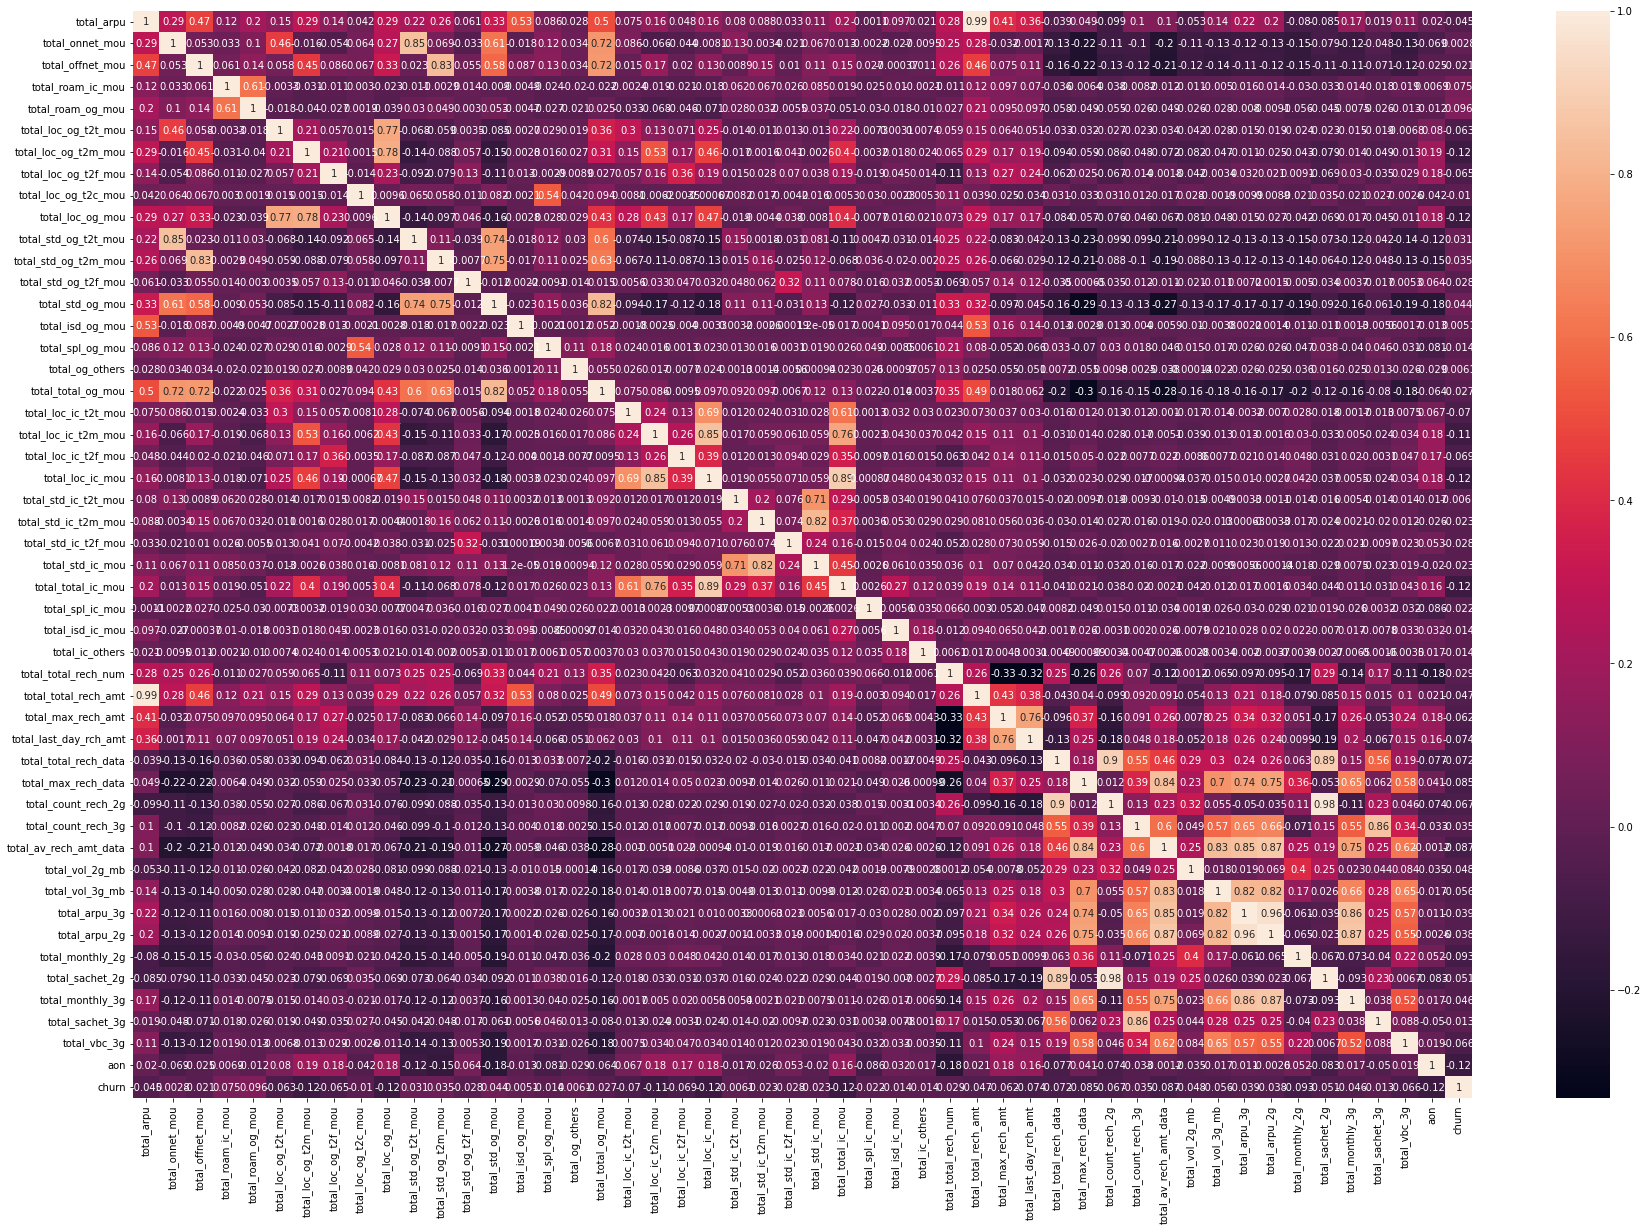

In [ ]:
#Lets plot the correlation matrix of new dataframe

#%matplotlib inline
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(total_data.corr(),annot = True)

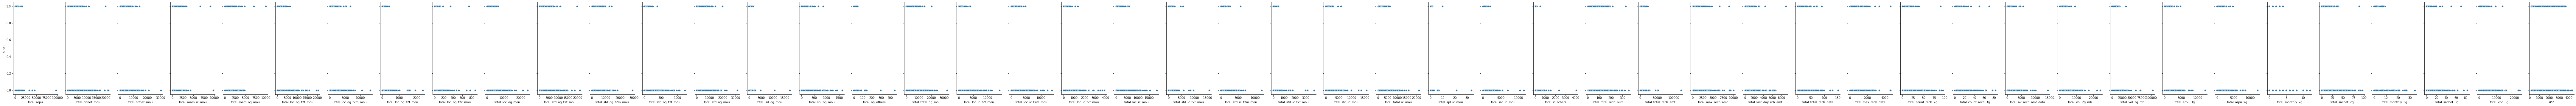

In [ ]:
#Pair plot of all the columns with respect to churn
sns.pairplot(total_data, x_vars=total_data.drop('churn', axis=1).columns, y_vars='churn', size=5, aspect=0.5,kind='scatter')

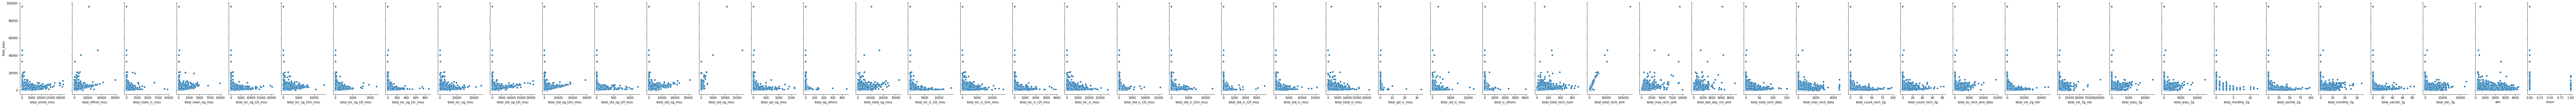

In [ ]:
sns.pairplot(total_data, x_vars=total_data.drop('total_arpu', axis=1).columns, y_vars='total_arpu', size=5, aspect=0.5,kind='scatter')

In [ ]:
#Outliers in total_arpu
total_data[total_data['total_arpu']>40000]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
38610,96420.546,17.84,10725.83,0.0,0.00,17.84,11.20,0.00,0.00,29.06,0.0,0.18,0.0,0.18,10727.21,0.00,0.0,10756.48,35.42,18.15,1.43,55.01,2.28,5.06,0.00,7.34,1672.78,0.19,1597.74,12.43,65.0,120845.0,9300.0,6235.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,460.0,0
51314,46152.276,0.18,17232.18,1.0,139.98,0.18,0.00,0.60,9.68,0.78,0.0,2.05,0.0,2.05,17072.48,19.74,0.0,17095.07,0.59,0.05,0.35,0.99,3.98,0.00,1.78,5.76,10.65,0.41,2.75,0.71,126.0,53479.0,3169.0,1500.0,2.0,504.0,0.0,2.0,504.0,26.42,833.73,424.34,424.34,0.0,0.0,2.0,0.0,1094.61,289.0,0
67717,40614.779,37.53,4913.58,0.0,0.00,37.53,43.21,3.35,0.15,84.11,0.0,11.02,0.0,11.02,4869.62,0.15,0.0,4964.93,42.78,28.20,0.00,71.00,1.54,35.16,0.00,36.71,578.33,0.00,470.58,0.00,131.0,45380.0,6550.0,6450.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,374.0,0


In [ ]:
#Outliers in total_offnet_mou
total_data[total_data['total_offnet_mou']>30000]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
33035,12124.74,2351.28,30177.43,0.0,0.0,96.07,352.46,4.93,23.53,453.48,2255.2,29126.03,0.0,31381.25,0.18,707.7,0.03,32542.68,34.93,157.47,38.28,230.71,15.26,107.46,0.0,122.75,353.91,0.43,0.0,0.0,111.0,14077.0,646.0,441.0,1.0,14.0,1.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,423.0,0


In [ ]:
#Outliers in total_roam_ic
total_data[total_data['total_roam_ic_mou']>9500]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
28436,1238.586,366.65,887.01,9716.2,1099.49,83.73,61.58,0.0,0.58,145.33,3.1,2.44,0.0,5.54,0.0,3.28,0.0,154.17,119.85,23.09,17.03,159.98,0.0,4.7,0.0,4.7,164.68,0.0,0.0,0.0,23.0,1411.0,365.0,365.0,4.0,435.0,0.0,4.0,580.0,30.48,1217.47,497.88,488.28,0.0,0.0,4.0,0.0,362.96,383.0,0


In [ ]:
#Outliers in total_roam_og_mou
total_data[total_data['total_roam_og_mou']>7500]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
74987,8101.6,8394.67,1502.15,27.66,9896.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,11354.0,8966.0,8966.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,1


In [ ]:
#Outliers in total_loc_og_t2f_mou
total_data[total_data['total_loc_og_t2f_mou']>2000]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
67497,4478.437,29.61,2675.15,0.0,0.0,29.61,312.41,2357.03,5.68,2699.1,0.0,0.0,0.0,0.0,0.0,8.54,0.0,2707.65,86.76,725.88,3296.79,4109.48,1.24,0.53,0.0,1.78,4111.61,0.33,0.01,0.0,86.0,5313.0,948.0,213.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,838.0,0


In [ ]:
#Outliers in total_std_og_t2m_mou
total_data[total_data['total_std_og_t2m_mou']>20000]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
33035,12124.74,2351.28,30177.43,0.0,0.0,96.07,352.46,4.93,23.53,453.48,2255.2,29126.03,0.0,31381.25,0.18,707.7,0.03,32542.68,34.93,157.47,38.28,230.71,15.26,107.46,0.0,122.75,353.91,0.43,0.0,0.0,111.0,14077.0,646.0,441.0,1.0,14.0,1.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,423.0,0


In [ ]:
#Outliers in total_std_og_mou
total_data[total_data['total_std_og_mou']>30000]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
33035,12124.74,2351.28,30177.43,0.0,0.0,96.07,352.46,4.93,23.53,453.48,2255.2,29126.03,0.0,31381.25,0.18,707.7,0.03,32542.68,34.93,157.47,38.28,230.71,15.26,107.46,0.0,122.75,353.91,0.43,0.0,0.0,111.0,14077.0,646.0,441.0,1.0,14.0,1.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,423.0,0


In [ ]:
#Outliers in total_isd_og_mou
total_data[total_data['total_isd_og_mou']>15000]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
51314,46152.276,0.18,17232.18,1.0,139.98,0.18,0.0,0.6,9.68,0.78,0.0,2.05,0.0,2.05,17072.48,19.74,0.0,17095.07,0.59,0.05,0.35,0.99,3.98,0.0,1.78,5.76,10.65,0.41,2.75,0.71,126.0,53479.0,3169.0,1500.0,2.0,504.0,0.0,2.0,504.0,26.42,833.73,424.34,424.34,0.0,0.0,2.0,0.0,1094.61,289.0,0


In [ ]:
#Outliers in total_og_others
total_data[total_data['total_og_others']>600]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn


In [ ]:
#Outliers in total_total_og_mou
total_data[total_data['total_total_og_mou']>30000]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
33035,12124.74,2351.28,30177.43,0.0,0.0,96.07,352.46,4.93,23.53,453.48,2255.2,29126.03,0.0,31381.25,0.18,707.7,0.03,32542.68,34.93,157.47,38.28,230.71,15.26,107.46,0.0,122.75,353.91,0.43,0.0,0.0,111.0,14077.0,646.0,441.0,1.0,14.0,1.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,423.0,0


In [ ]:
#Outliers in total_loc_ic_t2t_mou
total_data[total_data['total_loc_ic_t2t_mou']>12000]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
34952,2785.079,1438.76,1142.54,0.0,0.0,1201.29,536.78,36.3,35.29,1774.4,237.02,441.22,10.02,688.28,0.0,129.35,2.14,2594.21,14126.61,813.2,353.55,15293.4,317.55,345.94,24.33,687.87,16000.67,0.0,13.99,5.4,44.0,3113.0,395.0,395.0,1.0,175.0,1.0,0.0,175.0,57.18,1.66,0.0,7.4,1.0,0.0,0.0,0.0,1.89,605.0,0


In [ ]:
#Outliers in total_std_ic_t2m_mou
total_data[total_data['total_std_ic_t2m_mou']>10000]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
12898,2019.799,421.58,3518.78,24.13,16.85,24.83,233.33,0.0,39.01,258.18,396.74,3215.29,0.0,3612.05,0.0,71.63,0.0,3941.9,31.3,182.78,0.0,214.09,563.71,11891.03,27.05,12481.83,12695.95,0.0,0.0,0.0,38.0,2383.0,450.0,111.0,2.0,14.0,2.0,0.0,28.0,57.92,0.0,0.0,5.15,0.0,2.0,0.0,0.0,0.0,221.0,0


In [ ]:
#Outliers in total_isd_ic_mou
total_data[total_data['total_isd_ic_mou']>7500]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
71514,1758.512,278.68,612.53,0.0,0.0,222.19,210.52,21.66,0.00,454.41,56.47,38.69,0.0,95.17,341.62,0.00,0.0,891.23,258.96,78.52,12.52,350.04,140.27,75.28,6.73,222.30,12360.53,0.00,11418.48,369.66,17.0,2292.0,685.0,458.0,4.0,648.0,3.0,1.0,846.0,511.25,2228.54,454.00,258.27,3.0,0.0,1.0,0.0,2324.84,796.0,0
83599,3386.160,111.60,578.20,0.0,0.0,111.27,392.88,138.38,13.34,642.56,0.00,0.78,0.0,0.78,43.57,13.34,0.0,700.29,91.67,385.11,29.85,506.66,0.56,27.51,29.35,57.42,11009.48,0.33,10375.71,69.28,20.0,3918.0,1662.0,500.0,6.0,1662.0,0.0,6.0,2418.0,30.70,12787.07,2218.95,2052.50,0.0,0.0,6.0,0.0,5523.35,2372.0,0


In [ ]:
#Outliers in total_arpu_2g
total_data[total_data['total_arpu_2g']>10000]

,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,aon,churn
27531,12204.97,0.0,11.92,0.0,0.0,0.0,0.53,0.0,10.24,0.53,0.0,0.0,0.0,0.0,0.0,11.39,0.0,11.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.03,0.0,0.0,15.0,14376.0,4665.0,4665.0,10.0,4665.0,0.0,10.0,14346.0,0.27,103371.75,12248.3,12248.25,0.0,0.0,10.0,0.0,6445.67,222.0,0


In [ ]:
#Since these are few datapoints lets remove the outliers in both total and high_value_cust dataframes
high_value_cust = high_value_cust.drop(total_data[total_data['total_arpu']>40000].index)
total_data = total_data.drop(total_data[total_data['total_arpu']>40000].index)


high_value_cust = high_value_cust.drop(total_data[total_data['total_offnet_mou']>30000].index)
total_data = total_data.drop(total_data[total_data['total_offnet_mou']>30000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_roam_ic_mou']>9500].index)
total_data = total_data.drop(total_data[total_data['total_roam_ic_mou']>9500].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_roam_og_mou']>7500].index)
total_data = total_data.drop(total_data[total_data['total_roam_og_mou']>7500].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_loc_og_t2f_mou']>2000].index)
total_data = total_data.drop(total_data[total_data['total_loc_og_t2f_mou']>2000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_loc_ic_t2t_mou']>12000].index)
total_data = total_data.drop(total_data[total_data['total_loc_ic_t2t_mou']>12000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_std_ic_t2m_mou']>10000].index)
total_data = total_data.drop(total_data[total_data['total_std_ic_t2m_mou']>10000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_isd_ic_mou']>7500].index)
total_data = total_data.drop(total_data[total_data['total_isd_ic_mou']>7500].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_arpu_2g']>10000].index)
total_data = total_data.drop(total_data[total_data['total_arpu_2g']>10000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_total_rech_amt']==0].index)
total_data = total_data.drop(total_data[total_data['total_total_rech_amt']==0].index)

In [ ]:
#Get the info of the high_value_cust dataframe after dropping outliers
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27794 entries, 0 to 92707
Columns: 167 entries, last_date_of_month_6 to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(145), int64(1)
memory usage: 33.4 MB


In [ ]:
#Get the info of the total_data dataframe after dropping outliers
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27794 entries, 0 to 92707
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_arpu              27794 non-null  float64
 1   total_onnet_mou         27794 non-null  float64
 2   total_offnet_mou        27794 non-null  float64
 3   total_roam_ic_mou       27794 non-null  float64
 4   total_roam_og_mou       27794 non-null  float64
 5   total_loc_og_t2t_mou    27794 non-null  float64
 6   total_loc_og_t2m_mou    27794 non-null  float64
 7   total_loc_og_t2f_mou    27794 non-null  float64
 8   total_loc_og_t2c_mou    27794 non-null  float64
 9   total_loc_og_mou        27794 non-null  float64
 10  total_std_og_t2t_mou    27794 non-null  float64
 11  total_std_og_t2m_mou    27794 non-null  float64
 12  total_std_og_t2f_mou    27794 non-null  float64
 13  total_std_og_mou        27794 non-null  float64
 14  total_isd_og_mou        27794 non-null

In [ ]:
#Create new dataframe
goodvsaction_df = pd.DataFrame()

In [ ]:
#For all the columns input one if average of good months is greater than action month value else 0
for col in collist:
    goodvsaction_df['good_action_'+col] = high_value_cust[[col+'_6',col+'_7',col+'_8']].apply(lambda x: 1 if (((x[col+'_6']+x[col+'_7'])/2) >= (x[col+'_8'])) else -1, axis=1)

In [ ]:
#Convert the features to category
goodvsaction_df = goodvsaction_df.apply(lambda x: x.astype('category'))

In [ ]:
#Get first few rows of new dataframe
goodvsaction_df.head()

,good_action_arpu,good_action_onnet_mou,good_action_offnet_mou,good_action_roam_ic_mou,good_action_roam_og_mou,good_action_loc_og_t2t_mou,good_action_loc_og_t2m_mou,good_action_loc_og_t2f_mou,good_action_loc_og_t2c_mou,good_action_loc_og_mou,good_action_std_og_t2t_mou,good_action_std_og_t2m_mou,good_action_std_og_t2f_mou,good_action_std_og_mou,good_action_isd_og_mou,good_action_spl_og_mou,good_action_og_others,good_action_total_og_mou,good_action_loc_ic_t2t_mou,good_action_loc_ic_t2m_mou,good_action_loc_ic_t2f_mou,good_action_loc_ic_mou,good_action_std_ic_t2t_mou,good_action_std_ic_t2m_mou,good_action_std_ic_t2f_mou,good_action_std_ic_mou,good_action_total_ic_mou,good_action_spl_ic_mou,good_action_isd_ic_mou,good_action_ic_others,good_action_total_rech_num,good_action_total_rech_amt,good_action_max_rech_amt,good_action_last_day_rch_amt,good_action_total_rech_data,good_action_max_rech_data,good_action_count_rech_2g,good_action_count_rech_3g,good_action_av_rech_amt_data,good_action_vol_2g_mb,good_action_vol_3g_mb,good_action_arpu_3g,good_action_arpu_2g,good_action_monthly_2g,good_action_sachet_2g,good_action_monthly_3g,good_action_sachet_3g,good_action_vbc_3g
0,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,-1,1,1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1
8,1,1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,-1,1,1,1,1,-1,1,1,-1,1,1,1
16,1,-1,1,1,1,-1,1,-1,1,1,1,1,1,1,1,-1,1,1,1,1,-1,1,1,-1,-1,1,1,1,-1,1,1,1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
21,-1,1,-1,1,1,-1,-1,-1,1,-1,1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#Create new feature as difference of incoming and outgoing usages. Since we have 0 values we cannot use ratio
total_data['in_out_difference']=total_data['total_total_ic_mou']-total_data['total_total_og_mou']

In [ ]:
#Create new feature as difference of onnet and offnet usages. Since we have 0 values we cannot use ratio
total_data['onnet_offnet_difference'] = total_data['total_onnet_mou']-total_data['total_offnet_mou']

In [ ]:
#Get ratio of data arpu to amount arpu
total_data['arpu_data_to_total_ratio'] = (total_data['total_arpu_2g']+total_data['total_arpu_3g'])/total_data['total_arpu']

In [ ]:
#Get the ratio of average data recharge to amount recharge
total_data['data_to_amt_ratio']=total_data['total_av_rech_amt_data']/total_data['total_total_rech_amt']

In [ ]:
#Drop aon and churn columns from total_data
total_data=total_data.drop(['aon','churn'], axis=1)

In [ ]:
#Get info of total_data dataframe
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27794 entries, 0 to 92707
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_arpu                27794 non-null  float64
 1   total_onnet_mou           27794 non-null  float64
 2   total_offnet_mou          27794 non-null  float64
 3   total_roam_ic_mou         27794 non-null  float64
 4   total_roam_og_mou         27794 non-null  float64
 5   total_loc_og_t2t_mou      27794 non-null  float64
 6   total_loc_og_t2m_mou      27794 non-null  float64
 7   total_loc_og_t2f_mou      27794 non-null  float64
 8   total_loc_og_t2c_mou      27794 non-null  float64
 9   total_loc_og_mou          27794 non-null  float64
 10  total_std_og_t2t_mou      27794 non-null  float64
 11  total_std_og_t2m_mou      27794 non-null  float64
 12  total_std_og_t2f_mou      27794 non-null  float64
 13  total_std_og_mou          27794 non-null  float64
 14  total_

In [ ]:
#Get info of goodvsaction_df dataframe
goodvsaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27794 entries, 0 to 92707
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   good_action_arpu              27794 non-null  category
 1   good_action_onnet_mou         27794 non-null  category
 2   good_action_offnet_mou        27794 non-null  category
 3   good_action_roam_ic_mou       27794 non-null  category
 4   good_action_roam_og_mou       27794 non-null  category
 5   good_action_loc_og_t2t_mou    27794 non-null  category
 6   good_action_loc_og_t2m_mou    27794 non-null  category
 7   good_action_loc_og_t2f_mou    27794 non-null  category
 8   good_action_loc_og_t2c_mou    27794 non-null  category
 9   good_action_loc_og_mou        27794 non-null  category
 10  good_action_std_og_t2t_mou    27794 non-null  category
 11  good_action_std_og_t2m_mou    27794 non-null  category
 12  good_action_std_og_t2f_mou    27794 non-null  

In [ ]:
#Get high_value_cust dataframe
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27794 entries, 0 to 92707
Columns: 167 entries, last_date_of_month_6 to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(145), int64(1)
memory usage: 33.4 MB


In [ ]:
#Merge the dataframes
final_data = pd.concat([total_data, goodvsaction_df], axis=1)

In [ ]:
final_data = pd.concat([high_value_cust[high_value_cust.select_dtypes(include=['category']).columns.tolist()], final_data], axis=1)

In [ ]:
#Get the info of master dataframe
final_data.columns.tolist()

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'rech_amt_6',
 'rech_amt_7',
 'rech_amt_8',
 'rech_data_6',
 'rech_data_7',
 'rech_data_8',
 'total_arpu',
 'total_onnet_mou',
 'total_offnet_mou',
 'total_roam_ic_mou',
 'total_roam_og_mou',
 'total_loc_og_t2t_mou',
 'total_loc_og_t2m_mou',
 'total_loc_og_t2f_mou',
 'total_loc_og_t2c_mou',
 'total_loc_og_mou',
 'total_std_og_t2t_mou',
 'total_std_og_t2m_mou',
 'total_std_og_t2f_mou',
 'total_std_og_mou',
 'total_isd_og_mou',
 'total_spl_og_mou',
 'total_og_others',
 'total_total_og_mou',
 'total_loc_ic_t2t_mou',
 'total_loc_ic_t2m_mou',
 'total_loc_ic_t2f_mou',
 'total_loc_ic_mou',
 'total_std_ic_t2t_mou',
 'total_std_ic_t2m_mou',
 'total_std_ic_t2f_mou',
 'total_std_ic_mou',
 'total_total_ic_mou',
 'total_spl_ic_mou',
 'total_isd_ic_mou',
 'total_ic_others',
 'total_total_rech_num',
 'total_total_rech_amt',
 'total_max_rech_amt',
 'total_last_day_rch_amt',
 'total_total_rech_data

In [ ]:
final_data[['aon','churn']] = high_value_cust[['aon','churn']]

In [ ]:
#Get first few rows of dataframe
final_data.head(5)

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,rech_amt_6,rech_amt_7,rech_amt_8,rech_data_6,rech_data_7,rech_data_8,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,in_out_difference,onnet_offnet_difference,arpu_data_to_total_ratio,data_to_amt_ratio,good_action_arpu,good_action_onnet_mou,good_action_offnet_mou,good_action_roam_ic_mou,good_action_roam_og_mou,good_action_loc_og_t2t_mou,good_action_loc_og_t2m_mou,good_action_loc_og_t2f_mou,good_action_loc_og_t2c_mou,good_action_loc_og_mou,good_action_std_og_t2t_mou,good_action_std_og_t2m_mou,good_action_std_og_t2f_mou,good_action_std_og_mou,good_action_isd_og_mou,good_action_spl_og_mou,good_action_og_others,good_action_total_og_mou,good_action_loc_ic_t2t_mou,good_action_loc_ic_t2m_mou,good_action_loc_ic_t2f_mou,good_action_loc_ic_mou,good_action_std_ic_t2t_mou,good_action_std_ic_t2m_mou,good_action_std_ic_t2f_mou,good_action_std_ic_mou,good_action_total_ic_mou,good_action_spl_ic_mou,good_action_isd_ic_mou,good_action_ic_others,good_action_total_rech_num,good_action_total_rech_amt,good_action_max_rech_amt,good_action_last_day_rch_amt,good_action_total_rech_data,good_action_max_rech_data,good_action_count_rech_2g,good_action_count_rech_3g,good_action_av_rech_amt_data,good_action_vol_2g_mb,good_action_vol_3g_mb,good_action_arpu_3g,good_action_arpu_2g,good_action_monthly_2g,good_action_sachet_2g,good_action_monthly_3g,good_action_sachet_3g,good_action_vbc_3g,aon,churn
0,1,1,1,1,1,1,1,1,1,1,1,1,626.004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,9.0,866.0,756.0,756.0,3.0,756.0,0.0,3.0,756.0,37.20,343.94,636.51,636.51,0.0,0.0,3.0,0.0,131.60,5.44,0.00,2.033565,0.872979,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,968.0,1
7,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,5590.510,164.81,1346.50,81.36,74.39,123.05,918.29,170.50,0.00,1211.86,39.60,130.79,43.42,213.84,10.19,11.00,0.0,1446.93,117.71,560.24,293.15,971.15,79.11,359.76,108.64,547.56,1613.24,0.21,48.18,46.07,17.0,6008.0,3950.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,95.86,166.31,-1181.69,0.000000,0.000000,-1,1,1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,802.0,1
8,-1,1,1,-1,1,1,1,1,1,-1,1,1,1008.306,799.80,311.77,0.00,0.00,527.21,202.08,0.00,7.15,729.31,272.57,99.42,0.00,372.02,0.00,10.23,0.0,1111.58,33.99,87.04,0.00,121.05,0.68,27.16,0.00,27.84,148.89,0.00,0.00,0.00,54.0,1158.0,274.0,60.0,5.0,177.0,5.0,0.0,246.0,356.03,762.89,19.83,0.00,1.0,4.0,0.0,0.0,1053.84,-962.69,488.03,0.019667,0.212435,1,1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,-1,1,1,1,1,-1,1,1,-1,1,1,1,315.0,0
16,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,918.738,195.13,688.79,2.83,17.74,175.15,547.56,14.74,0.00,737.48,13.70,105.79,0.00,119.51,0.00,9.17,0.0,866.20,141.66,526.66,50.10,718.47,153.76,165.69,2.69,322.16,1040.88,0.00,0.23,0.00,18.0,1078.0,350.0,330.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,24.34,174.68,-493.66,0.000000,0.000000,1,-1,1,1,1,

In [ ]:
#Get the info of final dataframe
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27794 entries, 0 to 92707
Columns: 114 entries, night_pck_user_6 to churn
dtypes: category(60), float64(53), int64(1)
memory usage: 13.3 MB


In [ ]:
#Convert the churn dependent variable as int
final_data['churn']=final_data['churn'].astype(int)

In [ ]:
#Check if any nulls exist in final dataframe
round(100*(final_data.isnull().sum()/len(final_data.index)), 2).sum()

0.0

In [ ]:
#Get all string columns
str_cols = final_data.select_dtypes(include=['category']).columns.tolist()

In [ ]:
str_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'rech_amt_6',
 'rech_amt_7',
 'rech_amt_8',
 'rech_data_6',
 'rech_data_7',
 'rech_data_8',
 'good_action_arpu',
 'good_action_onnet_mou',
 'good_action_offnet_mou',
 'good_action_roam_ic_mou',
 'good_action_roam_og_mou',
 'good_action_loc_og_t2t_mou',
 'good_action_loc_og_t2m_mou',
 'good_action_loc_og_t2f_mou',
 'good_action_loc_og_t2c_mou',
 'good_action_loc_og_mou',
 'good_action_std_og_t2t_mou',
 'good_action_std_og_t2m_mou',
 'good_action_std_og_t2f_mou',
 'good_action_std_og_mou',
 'good_action_isd_og_mou',
 'good_action_spl_og_mou',
 'good_action_og_others',
 'good_action_total_og_mou',
 'good_action_loc_ic_t2t_mou',
 'good_action_loc_ic_t2m_mou',
 'good_action_loc_ic_t2f_mou',
 'good_action_loc_ic_mou',
 'good_action_std_ic_t2t_mou',
 'good_action_std_ic_t2m_mou',
 'good_action_std_ic_t2f_mou',
 'good_action_std_ic_mou',
 'good_action_total_ic_mou',
 'good_action_spl_ic_mo

In [ ]:
# Add data to pca data for transforming string variables
pca_data = final_data

In [ ]:
str_data=pca_data[str_cols]

In [ ]:
#Convert the category variables as a fraction of churn/ non churn on those variables
for col in str_cols:
    frac_val1 = sum(pca_data[pca_data[col]==-1].churn)/float(len(pca_data[pca_data[col]==-1].churn)-sum(pca_data[pca_data[col]==-1].churn))
    frac_val2 = sum(pca_data[pca_data[col]==1].churn)/float(len(pca_data[pca_data[col]==1].churn)-sum(pca_data[pca_data[col]==1].churn))            
    str_data[col] = pca_data.applymap(lambda x: frac_val1 if x==-1 else frac_val2)

ValueError: ignored

In [ ]:
str_data.head(20)

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,rech_amt_6,rech_amt_7,rech_amt_8,rech_data_6,rech_data_7,rech_data_8,good_action_arpu,good_action_onnet_mou,good_action_offnet_mou,good_action_roam_ic_mou,good_action_roam_og_mou,good_action_loc_og_t2t_mou,good_action_loc_og_t2m_mou,good_action_loc_og_t2f_mou,good_action_loc_og_t2c_mou,good_action_loc_og_mou,good_action_std_og_t2t_mou,good_action_std_og_t2m_mou,good_action_std_og_t2f_mou,good_action_std_og_mou,good_action_isd_og_mou,good_action_spl_og_mou,good_action_og_others,good_action_total_og_mou,good_action_loc_ic_t2t_mou,good_action_loc_ic_t2m_mou,good_action_loc_ic_t2f_mou,good_action_loc_ic_mou,good_action_std_ic_t2t_mou,good_action_std_ic_t2m_mou,good_action_std_ic_t2f_mou,good_action_std_ic_mou,good_action_total_ic_mou,good_action_spl_ic_mou,good_action_isd_ic_mou,good_action_ic_others,good_action_total_rech_num,good_action_total_rech_amt,good_action_max_rech_amt,good_action_last_day_rch_amt,good_action_total_rech_data,good_action_max_rech_data,good_action_count_rech_2g,good_action_count_rech_3g,good_action_av_rech_amt_data,good_action_vol_2g_mb,good_action_vol_3g_mb,good_action_arpu_3g,good_action_arpu_2g,good_action_monthly_2g,good_action_sachet_2g,good_action_monthly_3g,good_action_sachet_3g,good_action_vbc_3g
0,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1
8,-1,1,1,-1,1,1,1,1,1,-1,1,1,1,1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,-1,1,1,1,1,-1,1,1,-1,1,1,1
16,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,1,-1,1,1,1,-1,1,-1,1,1,1,1,1,1,1,-1,1,1,1,1,-1,1,1,-1,-1,1,1,1,-1,1,1,1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
21,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1,-1,1,-1,1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
33,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,-1,-1,-1,1,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1
38,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,1,-1,-1,1,1,1,1,1,1,1,-1,-1,1,-1,1,1,1,-1,1,-1,1,1,1,-1,1,1,1,1,1,1,1,1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
41,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
48,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
53,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#Add the transformed string columns back to pca dataset
pca_data[str_cols]=str_data[str_cols]

In [ ]:
pca_data.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,rech_amt_6,rech_amt_7,rech_amt_8,rech_data_6,rech_data_7,rech_data_8,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,in_out_difference,onnet_offnet_difference,arpu_data_to_total_ratio,data_to_amt_ratio,good_action_arpu,good_action_onnet_mou,good_action_offnet_mou,good_action_roam_ic_mou,good_action_roam_og_mou,good_action_loc_og_t2t_mou,good_action_loc_og_t2m_mou,good_action_loc_og_t2f_mou,good_action_loc_og_t2c_mou,good_action_loc_og_mou,good_action_std_og_t2t_mou,good_action_std_og_t2m_mou,good_action_std_og_t2f_mou,good_action_std_og_mou,good_action_isd_og_mou,good_action_spl_og_mou,good_action_og_others,good_action_total_og_mou,good_action_loc_ic_t2t_mou,good_action_loc_ic_t2m_mou,good_action_loc_ic_t2f_mou,good_action_loc_ic_mou,good_action_std_ic_t2t_mou,good_action_std_ic_t2m_mou,good_action_std_ic_t2f_mou,good_action_std_ic_mou,good_action_total_ic_mou,good_action_spl_ic_mou,good_action_isd_ic_mou,good_action_ic_others,good_action_total_rech_num,good_action_total_rech_amt,good_action_max_rech_amt,good_action_last_day_rch_amt,good_action_total_rech_data,good_action_max_rech_data,good_action_count_rech_2g,good_action_count_rech_3g,good_action_av_rech_amt_data,good_action_vol_2g_mb,good_action_vol_3g_mb,good_action_arpu_3g,good_action_arpu_2g,good_action_monthly_2g,good_action_sachet_2g,good_action_monthly_3g,good_action_sachet_3g,good_action_vbc_3g,aon,churn
0,1,1,1,1,1,1,1,1,1,1,1,1,626.004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,9.0,866.0,756.0,756.0,3.0,756.0,0.0,3.0,756.0,37.20,343.94,636.51,636.51,0.0,0.0,3.0,0.0,131.60,5.44,0.00,2.033565,0.872979,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,968.0,1
7,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,5590.510,164.81,1346.50,81.36,74.39,123.05,918.29,170.50,0.00,1211.86,39.60,130.79,43.42,213.84,10.19,11.00,0.0,1446.93,117.71,560.24,293.15,971.15,79.11,359.76,108.64,547.56,1613.24,0.21,48.18,46.07,17.0,6008.0,3950.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,95.86,166.31,-1181.69,0.000000,0.000000,-1,1,1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,802.0,1
8,-1,1,1,-1,1,1,1,1,1,-1,1,1,1008.306,799.80,311.77,0.00,0.00,527.21,202.08,0.00,7.15,729.31,272.57,99.42,0.00,372.02,0.00,10.23,0.0,1111.58,33.99,87.04,0.00,121.05,0.68,27.16,0.00,27.84,148.89,0.00,0.00,0.00,54.0,1158.0,274.0,60.0,5.0,177.0,5.0,0.0,246.0,356.03,762.89,19.83,0.00,1.0,4.0,0.0,0.0,1053.84,-962.69,488.03,0.019667,0.212435,1,1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,-1,1,1,1,1,-1,1,1,-1,1,1,1,315.0,0
16,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,918.738,195.13,688.79,2.83,17.74,175.15,547.56,14.74,0.00,737.48,13.70,105.79,0.00,119.51,0.00,9.17,0.0,866.20,141.66,526.66,50.10,718.47,153.76,165.69,2.69,322.16,1040.88,0.00,0.23,0.00,18.0,1078.0,350.0,330.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,24.34,174.68,-493.66,0.000000,0.000000,1,-1,1,1,1,

In [ ]:
#Merge the dataframes
final_data = pd.concat([total_data, goodvsaction_df], axis=1)
final_data = pd.concat([high_value_cust[high_value_cust.select_dtypes(include=['category']).columns.tolist()], final_data], axis=1)
final_data[['aon','churn']] = high_value_cust[['aon','churn']]
#Convert the churn dependent variable as int
final_data['churn']=final_data['churn'].astype(int)
final_data.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,rech_amt_6,rech_amt_7,rech_amt_8,rech_data_6,rech_data_7,rech_data_8,total_arpu,total_onnet_mou,total_offnet_mou,total_roam_ic_mou,total_roam_og_mou,total_loc_og_t2t_mou,total_loc_og_t2m_mou,total_loc_og_t2f_mou,total_loc_og_t2c_mou,total_loc_og_mou,total_std_og_t2t_mou,total_std_og_t2m_mou,total_std_og_t2f_mou,total_std_og_mou,total_isd_og_mou,total_spl_og_mou,total_og_others,total_total_og_mou,total_loc_ic_t2t_mou,total_loc_ic_t2m_mou,total_loc_ic_t2f_mou,total_loc_ic_mou,total_std_ic_t2t_mou,total_std_ic_t2m_mou,total_std_ic_t2f_mou,total_std_ic_mou,total_total_ic_mou,total_spl_ic_mou,total_isd_ic_mou,total_ic_others,total_total_rech_num,total_total_rech_amt,total_max_rech_amt,total_last_day_rch_amt,total_total_rech_data,total_max_rech_data,total_count_rech_2g,total_count_rech_3g,total_av_rech_amt_data,total_vol_2g_mb,total_vol_3g_mb,total_arpu_3g,total_arpu_2g,total_monthly_2g,total_sachet_2g,total_monthly_3g,total_sachet_3g,total_vbc_3g,in_out_difference,onnet_offnet_difference,arpu_data_to_total_ratio,data_to_amt_ratio,good_action_arpu,good_action_onnet_mou,good_action_offnet_mou,good_action_roam_ic_mou,good_action_roam_og_mou,good_action_loc_og_t2t_mou,good_action_loc_og_t2m_mou,good_action_loc_og_t2f_mou,good_action_loc_og_t2c_mou,good_action_loc_og_mou,good_action_std_og_t2t_mou,good_action_std_og_t2m_mou,good_action_std_og_t2f_mou,good_action_std_og_mou,good_action_isd_og_mou,good_action_spl_og_mou,good_action_og_others,good_action_total_og_mou,good_action_loc_ic_t2t_mou,good_action_loc_ic_t2m_mou,good_action_loc_ic_t2f_mou,good_action_loc_ic_mou,good_action_std_ic_t2t_mou,good_action_std_ic_t2m_mou,good_action_std_ic_t2f_mou,good_action_std_ic_mou,good_action_total_ic_mou,good_action_spl_ic_mou,good_action_isd_ic_mou,good_action_ic_others,good_action_total_rech_num,good_action_total_rech_amt,good_action_max_rech_amt,good_action_last_day_rch_amt,good_action_total_rech_data,good_action_max_rech_data,good_action_count_rech_2g,good_action_count_rech_3g,good_action_av_rech_amt_data,good_action_vol_2g_mb,good_action_vol_3g_mb,good_action_arpu_3g,good_action_arpu_2g,good_action_monthly_2g,good_action_sachet_2g,good_action_monthly_3g,good_action_sachet_3g,good_action_vbc_3g,aon,churn
0,1,1,1,1,1,1,1,1,1,1,1,1,626.004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,9.0,866.0,756.0,756.0,3.0,756.0,0.0,3.0,756.0,37.20,343.94,636.51,636.51,0.0,0.0,3.0,0.0,131.60,5.44,0.00,2.033565,0.872979,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,968.0,1
7,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,5590.510,164.81,1346.50,81.36,74.39,123.05,918.29,170.50,0.00,1211.86,39.60,130.79,43.42,213.84,10.19,11.00,0.0,1446.93,117.71,560.24,293.15,971.15,79.11,359.76,108.64,547.56,1613.24,0.21,48.18,46.07,17.0,6008.0,3950.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,95.86,166.31,-1181.69,0.000000,0.000000,-1,1,1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,802.0,1
8,-1,1,1,-1,1,1,1,1,1,-1,1,1,1008.306,799.80,311.77,0.00,0.00,527.21,202.08,0.00,7.15,729.31,272.57,99.42,0.00,372.02,0.00,10.23,0.0,1111.58,33.99,87.04,0.00,121.05,0.68,27.16,0.00,27.84,148.89,0.00,0.00,0.00,54.0,1158.0,274.0,60.0,5.0,177.0,5.0,0.0,246.0,356.03,762.89,19.83,0.00,1.0,4.0,0.0,0.0,1053.84,-962.69,488.03,0.019667,0.212435,1,1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,-1,1,1,1,1,-1,1,1,-1,1,1,1,315.0,0
16,-1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,918.738,195.13,688.79,2.83,17.74,175.15,547.56,14.74,0.00,737.48,13.70,105.79,0.00,119.51,0.00,9.17,0.0,866.20,141.66,526.66,50.10,718.47,153.76,165.69,2.69,322.16,1040.88,0.00,0.23,0.00,18.0,1078.0,350.0,330.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,24.34,174.68,-493.66,0.000000,0.000000,1,-1,1,1,1,

In [ ]:
#Import scale package
from sklearn.preprocessing import scale
#Scale all the independent variables and get into new dataframe
X=pd.DataFrame(scale(pca_data.drop(['churn'],axis=1)))
#Get independent variable into new dataframe
y = pca_data['churn']
#Get independent columns and update dataframe
X.columns=pca_data.drop('churn',axis=1).columns

In [ ]:
#Import test_train_split to get train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [ ]:
#Get train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=100)

In [ ]:
# Importing metrics for evalutation from  from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_score, recall_score, f1_score

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13618 entries, 4353 to 3716
Columns: 113 entries, night_pck_user_6 to aon
dtypes: float64(113)
memory usage: 11.8 MB


In [ ]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

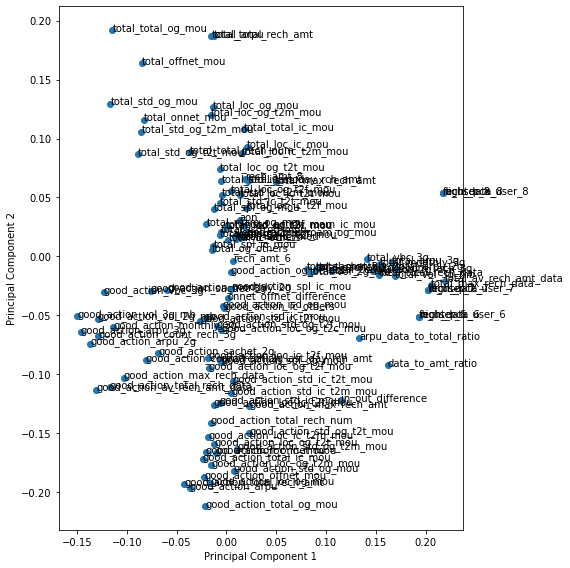

In [ ]:
# Lets see the distibutions of columns in PCA in 2d space
pca.fit(X_train)
fig = plt.figure(figsize = (8,8))
plt.scatter(pca.components_[0],pca.components_[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(X_train.columns):
    plt.annotate(txt, (pca.components_[0][i],pca.components_[1][i]))
plt.tight_layout()
plt.show()

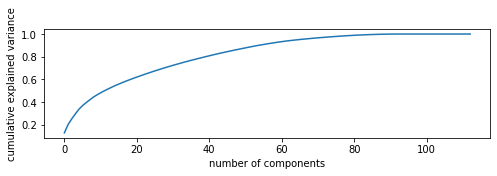

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,2))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#Import incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [ ]:
#Fit the train data
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(13618, 30)

In [ ]:
#Fit the validation data
df_val_pca = pca_final.fit_transform(X_val)
df_val_pca.shape

(5837, 30)

In [ ]:
#Fit the validation data
df_test_pca = pca_final.fit_transform(X_test)
df_test_pca.shape

(8339, 30)

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameter and balanced subsample to tackle class imbalance.
rfc = RandomForestClassifier(class_weight='balanced_subsample')

In [ ]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced_subsample')

In [ ]:
# Let's check the report of our default model on training data
print(classification_report(y_train,rfc.predict(df_train_pca)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00      1118

    accuracy                           1.00     13618
   macro avg       1.00      1.00      1.00     13618
weighted avg       1.00      1.00      1.00     13618



In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_train,rfc.predict(df_train_pca)))

[[12500     0]
 [    0  1118]]


In [ ]:
# Let's check the report of our default model on validation data
print(classification_report(y_val,rfc.predict(df_val_pca)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5374
           1       0.48      0.02      0.04       463

    accuracy                           0.92      5837
   macro avg       0.70      0.51      0.50      5837
weighted avg       0.89      0.92      0.89      5837



In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_val,rfc.predict(df_val_pca)))

[[5363   11]
 [ 453   10]]


In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5
scoring = {'AUC': 'roc_auc'}
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 1)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',verbose=1)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
#Add the results to dataframe
pd.DataFrame(train_results).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.586294,0.024479,0.031552,0.000723,2,{'max_depth': 2},0.892883,0.880500,0.880467,0.874790,0.867026,0.879133,0.008463,18
1,2.053650,0.012873,0.034979,0.001314,3,{'max_depth': 3},0.900509,0.887753,0.886379,0.890518,0.876772,0.888386,0.007627,17
2,2.632062,0.220793,0.040322,0.005622,4,{'max_depth': 4},0.905114,0.893452,0.892213,0.893850,0.883674,0.893661,0.006828,16
3,3.015187,0.219152,0.039508,0.001031,5,{'max_depth': 5},0.910034,0.899912,0.898000,0.895860,0.883393,0.897440,0.008542,13
4,3.287752,0.037942,0.042384,0.001283,6,{'max_depth': 6},0.909034,0.900392,0.898156,0.901020,0.883152,0.898351,0.008443,12
5,3.790820,0.278104,0.083064,0.074183,7,{'max_depth': 7},0.908136,0.904346,0.898889,0.906989,0.883458,0.900364,0.009035,4
6,3.918222,0.022403,0.046821,0.000500,8,{'max_depth': 8},0.911198,0.903332,0.902119,0.903543,0.887031,0.901445,0.007890,2
7,4.180690,0.032951,0.053582,0.002267,9,{'max_depth': 9},0.908585,0.900014,0.902346,0.903693,0.886468,0.900221,0.007426,5
8,4.355918,0.023397,0.052143,0.001388,10,{'max_depth': 10},0.907620,0.904782,0.906343,0.904648,0.883354,0.901349,0.009064,3
9,4.473270,0.013283,0.052875,0.000759,11,{'max_depth': 11},0.905766,0.902518,0.900279,0.905921,0.882240,0.899345,0.008809,8


In [ ]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(2, 20, 1):
    rf = RandomForestClassifier(max_depth=feature,class_weight='balanced_subsample')
    rf.fit(df_train_pca,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(df_val_pca))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

Text(0, 0.5, 'AUC Score')

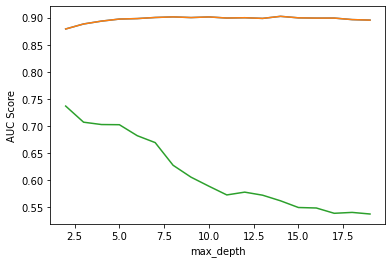

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(train_results["param_max_depth"], 
         train_results["mean_test_score"], 
         label="train auc score")
plt.plot(train_results["param_max_depth"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("max_depth")
plt.ylabel("AUC Score")

In [ ]:
#Fit the range of features
parameters = {'n_estimators': range(200, 1800, 200)}

# instantiate the model ()
rf = RandomForestClassifier(class_weight='balanced_subsample', max_depth=6)

# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1,verbose=10)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
pd.DataFrame(train_results).head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.331249,0.117475,0.117807,0.009017,200,{'n_estimators': 200},0.908811,0.901559,0.898955,0.901978,0.887742,0.899809,0.006858,7
1,18.591524,0.298544,0.216841,0.005816,400,{'n_estimators': 400},0.909077,0.902187,0.900084,0.902560,0.884009,0.899583,0.008350,8
2,28.121088,0.248164,0.327308,0.008908,600,{'n_estimators': 600},0.910382,0.902605,0.899859,0.902579,0.884667,0.900019,0.008442,5
3,38.198847,1.558456,0.433357,0.008767,800,{'n_estimators': 800},0.910279,0.902396,0.900580,0.902269,0.884969,0.900099,0.008280,4
4,46.419666,0.097878,0.534289,0.005150,1000,{'n_estimators': 1000},0.910321,0.902009,0.901230,0.902979,0.886997,0.900707,0.007583,1
5,56.652541,0.933116,0.651107,0.006945,1200,{'n_estimators': 1200},0.909209,0.902416,0.899659,0.903812,0.885713,0.900162,0.007865,3
6,65.293386,0.153768,0.771880,0.023366,1400,{'n_estimators': 1400},0.909291,0.901745,0.899507,0.903302,0.885792,0.899927,0.007776,6
7,72.985360,4.741695,0.911608,0.235534,1600,{'n_estimators': 1600},0.909996,0.901246,0.901164,0.903189,0.885917,0.900303,0.007885,2


In [ ]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(200, 1800, 200):
    rf = RandomForestClassifier(n_estimators=feature, class_weight='balanced_subsample', max_depth=6)
    rf.fit(df_train_pca,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(df_val_pca))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

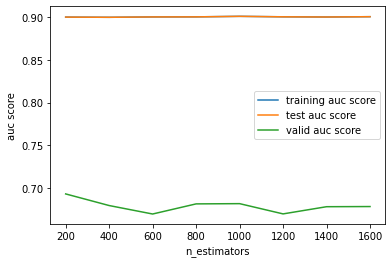

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(train_results["param_n_estimators"], 
         train_results["mean_test_score"], 
         label="training auc score")
plt.plot(train_results["param_n_estimators"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("n_estimators")
plt.ylabel("auc score")
plt.legend()
plt.show()

In [ ]:
# parameters to build the model on max_features
parameters = {'max_features': range(2, 30, 2)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1, verbose=10)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [ ]:
pd.DataFrame(train_results).head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.612083,0.036814,0.087696,0.008430,2,{'max_features': 2},0.896796,0.889623,0.893787,0.904389,0.892850,0.895489,0.005004,4
1,5.959802,0.053548,0.080570,0.007730,4,{'max_features': 4},0.900072,0.897108,0.903498,0.899847,0.879926,0.896090,0.008332,2
2,8.451101,0.056427,0.076382,0.003048,6,{'max_features': 6},0.905209,0.892395,0.901476,0.897771,0.886425,0.896655,0.006640,1
3,10.946402,0.145556,0.079285,0.006597,8,{'max_features': 8},0.901637,0.893259,0.893421,0.898603,0.875511,0.892486,0.009064,11
4,14.082851,0.631121,0.093824,0.039933,10,{'max_features': 10},0.896448,0.893153,0.894730,0.899920,0.887409,0.894332,0.004128,6
5,16.891600,0.768545,0.073577,0.001898,12,{'max_features': 12},0.896145,0.895663,0.903723,0.897033,0.876222,0.893757,0.009240,7
6,18.970190,0.363953,0.075709,0.008297,14,{'max_features': 14},0.899686,0.904104,0.899246,0.891354,0.883742,0.895626,0.007224,3
7,21.508821,0.436669,0.070705,0.000704,16,{'max_features': 16},0.900039,0.900359,0.902650,0.896819,0.867904,0.893554,0.012959,9
8,24.377033,0.524920,0.080304,0.011214,18,{'max_features': 18},0.897825,0.898657,0.897680,0.903356,0.877357,0.894975,0.009051,5
9,26.823452,0.591197,0.071728,0.003621,20,{'max_features': 20},0.894845,0.900234,0.896786,0.890478,0.870331,0.890535,0.010582,12


In [ ]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(2, 30, 2):
    rf = RandomForestClassifier(max_features=feature,class_weight='balanced_subsample')
    rf.fit(df_train_pca,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(df_val_pca))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

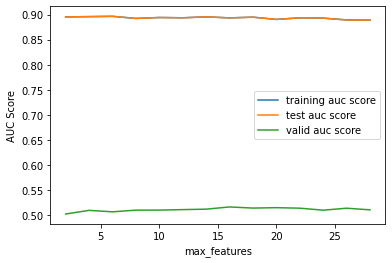

In [ ]:
# plotting accuracies with param_max_features
plt.figure()
plt.plot(train_results["param_max_features"], 
         train_results["mean_test_score"], 
         label="training auc score")
plt.plot(train_results["param_max_features"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("max_features")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [ ]:
# parameters to build the model on min_samples_leaf
parameters = {'min_samples_leaf': range(10, 400, 10)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

In [ ]:
pd.DataFrame(train_results).head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.402236,0.733967,0.071460,0.002737,10,{'min_samples_leaf': 10},0.909225,0.905379,0.908888,0.900567,0.889720,0.902756,0.007226,2
1,5.991511,0.034742,0.067798,0.001210,20,{'min_samples_leaf': 20},0.910355,0.905411,0.902898,0.907769,0.888804,0.903047,0.007539,1
2,5.728888,0.046720,0.073020,0.008401,30,{'min_samples_leaf': 30},0.908677,0.907720,0.899339,0.906400,0.887891,0.902005,0.007782,6
3,5.546046,0.031661,0.068294,0.003547,40,{'min_samples_leaf': 40},0.908993,0.905220,0.904691,0.905517,0.888701,0.902624,0.007124,3
4,5.364120,0.051333,0.064279,0.000886,50,{'min_samples_leaf': 50},0.907407,0.903502,0.901993,0.908429,0.891308,0.902528,0.006095,4
5,5.219444,0.041297,0.063581,0.001613,60,{'min_samples_leaf': 60},0.908623,0.907821,0.902559,0.903609,0.887743,0.902071,0.007535,5
6,5.117422,0.052843,0.061493,0.000371,70,{'min_samples_leaf': 70},0.905687,0.903418,0.899557,0.905808,0.890770,0.901048,0.005616,7
7,5.251144,0.365344,0.063610,0.003968,80,{'min_samples_leaf': 80},0.908079,0.900454,0.900227,0.903557,0.886730,0.899809,0.007129,9
8,4.931894,0.049887,0.064038,0.004840,90,{'min_samples_leaf': 90},0.904754,0.905257,0.897398,0.904002,0.883107,0.898903,0.008395,11
9,4.780930,0.029597,0.060606,0.000550,100,{'min_samples_leaf': 100},0.907327,0.902732,0.898902,0.904990,0.886045,0.899999,0.007510,8


In [ ]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(10, 400, 10):
    rf = RandomForestClassifier(min_samples_leaf=feature, class_weight='balanced_subsample')
    rf.fit(df_train_pca,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(df_val_pca))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

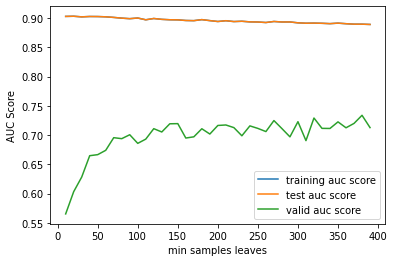

In [ ]:
# plotting accuracies with param_min_samples_leaf
plt.figure()
plt.plot(train_results["param_min_samples_leaf"], 
         train_results["mean_test_score"], 
         label="training auc score")
plt.plot(train_results["param_min_samples_leaf"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("min samples leaves")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [ ]:
# parameters to build the model on min_samples_split
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

In [ ]:
pd.DataFrame(train_results).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.030660,0.094864,0.063834,0.001238,200,{'min_samples_split': 200},0.906716,0.900605,0.902104,0.904603,0.884920,0.899790,0.007723,3
1,5.844471,0.059071,0.063167,0.002786,250,{'min_samples_split': 250},0.905473,0.903754,0.900145,0.906208,0.887474,0.900611,0.006894,1
2,5.681923,0.041294,0.061418,0.002228,300,{'min_samples_split': 300},0.905059,0.903518,0.898977,0.905094,0.883851,0.899300,0.008041,4
3,5.506897,0.094370,0.059792,0.000653,350,{'min_samples_split': 350},0.905382,0.904007,0.901904,0.903365,0.884653,0.899862,0.007686,2
4,5.362813,0.050728,0.058349,0.000481,400,{'min_samples_split': 400},0.903820,0.903827,0.897932,0.901579,0.883573,0.898146,0.007598,6
5,5.214911,0.035820,0.055059,0.006342,450,{'min_samples_split': 450},0.907168,0.901345,0.899145,0.902283,0.882764,0.898541,0.008313,5


In [ ]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(200, 500, 50):
    rf = RandomForestClassifier(min_samples_split=feature,class_weight='balanced_subsample')
    rf.fit(df_train_pca,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(df_val_pca))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

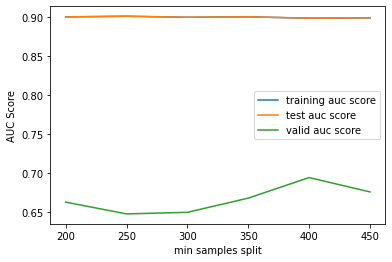

In [ ]:
# plotting accuracies with param_min_samples_split
plt.figure()
plt.plot(train_results["param_min_samples_split"], 
         train_results["mean_test_score"], 
         label="training auc score")
plt.plot(train_results["param_min_samples_split"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("min samples split")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=6,
                             min_samples_leaf=100, 
                             min_samples_split=370,
                             max_features=28,
                             n_estimators=600,
                             class_weight='balanced_subsample')

In [ ]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       max_features=28, min_samples_leaf=100,
                       min_samples_split=370, n_estimators=600)

In [ ]:
# Let's check the report of our optimal model on training data
print(classification_report(y_train,rfc.predict(df_train_pca)))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     12500
           1       0.34      0.83      0.49      1118

    accuracy                           0.86     13618
   macro avg       0.66      0.84      0.70     13618
weighted avg       0.93      0.86      0.88     13618



In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_train,rfc.predict(df_train_pca)))

[[10742  1758]
 [  193   925]]


In [ ]:
# Let's check the report of our optimal model on validation data
print(classification_report(y_val,rfc.predict(df_val_pca)))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      5374
           1       0.26      0.61      0.37       463

    accuracy                           0.83      5837
   macro avg       0.61      0.73      0.64      5837
weighted avg       0.91      0.83      0.86      5837



In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_val,rfc.predict(df_val_pca)))

[[4573  801]
 [ 179  284]]


In [ ]:
# Let's check the report of our default model on validation data
print(classification_report(y_test,rfc.predict(df_test_pca)))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      7655
           1       0.30      0.63      0.40       684

    accuracy                           0.85      8339
   macro avg       0.63      0.75      0.66      8339
weighted avg       0.91      0.85      0.87      8339



In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test,rfc.predict(df_test_pca)))

[[6632 1023]
 [ 254  430]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_base = RandomForestClassifier(bootstrap=True,
                             max_depth=1,
                             class_weight='balanced_subsample')

In [ ]:
#import Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
# parameter grid
param_grid = {"learning_rate": [0.005, 0.01, 0.05, 0.1, 0.5, 1]}

In [ ]:
# adaboost with the default tree as base estimator and SAMMME.R for faster convergence
ABC = AdaBoostClassifier(
    base_estimator=rfc_base,
    algorithm="SAMME.R", random_state=10, n_estimators=600)
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 5, n_jobs=-1)
# fit 
grid_search_ABC.fit(df_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


KeyboardInterrupt: ignored

In [ ]:
pd.DataFrame(grid_search_ABC.cv_results_).sort_values('rank_test_score')

In [ ]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in [0.005, 0.01, 0.05, 0.1, 0.5, 1]:
    ABC = AdaBoostClassifier(
    base_estimator=rfc_base,
    algorithm="SAMME.R", learning_rate=feature)
    ABC.fit(df_train_pca,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, ABC.predict(df_val_pca))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

In [ ]:
# plotting accuracies with param_min_samples_split
plt.figure()
plt.plot(pd.DataFrame(grid_search_ABC.cv_results_)["param_learning_rate"], 
         pd.DataFrame(grid_search_ABC.cv_results_)["mean_train_score"], 
         label="training auc score")
plt.plot(pd.DataFrame(grid_search_ABC.cv_results_)["param_learning_rate"], 
         pd.DataFrame(grid_search_ABC.cv_results_)["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("learning rate")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [ ]:
# printing the optimal auc score and hyperparameters
print('We can get auc score of',grid_search_ABC.best_score_,'using',grid_search_ABC.best_params_)

In [ ]:
#Fit the optimal learning parameter on base tree
ABC_Optimal = AdaBoostClassifier(
base_estimator=rfc_base,
algorithm="SAMME.R", learning_rate=0.005)

ABC_Optimal.fit(df_train_pca,y_train)

In [ ]:
# Let's check the report of our default model on training data
print(classification_report(y_train,ABC_Optimal.predict(df_train_pca)))

In [ ]:
# Let's check the report of our default model on validation data
print(classification_report(y_val,ABC_Optimal.predict(df_val_pca)))

In [ ]:
# Let's check the report of our default model on test data
print(confusion_matrix(y_test,ABC_Optimal.predict(df_test_pca)))

In [ ]:
# Let's check the report of our default model on training data
print(classification_report(y_test,ABC_Optimal.predict(df_test_pca)))

## Results through PCA

We get around 0.85 F1 score on the test data which is reasonable and 0.88 of preciscion and 0.82 of recall

We will use Lasso to understand what could be major predictors so that we dont drop them straight away. We will use a mild regulator 0.01 and get the features through lasso. But first let eliminate non important features and highly correlated features through RPA
For optimal parameter lets use RFE to eliminate features to do lasso regression to identify strong predictors

In [ ]:
#Scale all the independent variables and get into new dataframe
X=pd.DataFrame(scale(final_data.drop(['churn'],axis=1)))
#Get independent variable into new dataframe
y = final_data['churn']
#Get independent columns and update dataframe
X.columns=final_data.drop('churn',axis=1).columns

In [ ]:
#Import test_train_split to get train and test data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [ ]:
#Get train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=100)

In [ ]:
#Import LogisticRegression module
from sklearn.linear_model import LogisticRegression

In [ ]:
auc_list_train = []
auc_list_valid = []
feature_list=[]
from sklearn.feature_selection import RFE
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
X_train_reduce = X_train
X_val_reduce = X_val
for features in range(110,10,-10):
    lm = LogisticRegression(class_weight='balanced')
    rfe = RFE(lm, features)                   # running RFE
    rfe = rfe.fit(X_train, y_train)
    X_train_reduce = X_train.drop(X_train.columns[~rfe.support_].tolist(),1)
    lm.fit(X_train_reduce,y_train)
    fpr, tpr, thresholds = roc_curve(y_train, lm.predict(X_train_reduce))
    
    X_val_reduce=X_val.drop(X_val.columns[~rfe.support_].tolist(),1)
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, lm.predict(X_val_reduce))
    #print(fpr)
    #print(tpr)
    print(str(features),'-',str(auc(fpr, tpr)),'-',str(auc(fpr_val, tpr_val)))
    feature_list.append(features)
    auc_list_train.append(auc(fpr, tpr))
    auc_list_valid.append(auc(fpr_val, tpr_val))

110 - 0.8421108587930876 - 0.8205790902701503
100 - 0.8416500572428188 - 0.8208391457486525
90 - 0.841835420926366 - 0.8217158517259534
80 - 0.8406595239860607 - 0.8238160043185578
70 - 0.8403047253287221 - 0.8229392983412569
60 - 0.8390123948610904 - 0.8182188821990438
50 - 0.8388058871505896 - 0.8146450818949276
40 - 0.8354849867983355 - 0.8130748946416212
30 - 0.8332131192246646 - 0.8131911429480037
20 - 0.8284095921621951 - 0.8142904911557755


Text(0,0.5,'AUC Score')

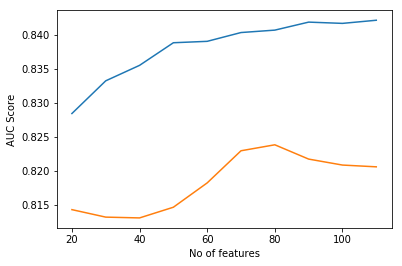

In [ ]:
plt.figure()
plt.plot(feature_list, 
         auc_list_train, 
         label="train auc score")
plt.plot(feature_list,
         auc_list_valid, 
         label="test auc score")
plt.xlabel("No of features")
plt.ylabel("AUC Score")

80 seems to be the optimal number of features, lets consider the features through RFE

In [ ]:
# Importing statsmodels
import statsmodels.api as sm  
# Add constant 
lm = LogisticRegression(class_weight='balanced')
rfe = RFE(lm, 80)                   # running RFE
rfe = rfe.fit(X_train, y_train)
X_train_model = X_train.drop(X_train.columns[~rfe.support_].tolist(),1)
X_train_model = sm.add_constant(X_train_model)  
#Fit a binomial model
lm_stats = sm.GLM(list(y_train),X_train_model, family=sm.families.Binomial()).fit()
lm_stats.summary()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
p_values = pd.DataFrame()
p_values["features"]=lm_stats.pvalues.index
p_values["p_value"]=lm_stats.pvalues.values
p_values = p_values.sort_values('p_value', ascending = False)
vif["VIF Factor"] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
vif["features"] = X_train_model.columns
result = pd.merge(vif,p_values,on='features')
result.sort_values(['VIF Factor','p_value']).head(80)

In [ ]:
def getStatisticsAfterDrop(feature):
    global X_train_model
    X_train_model=X_train_model.drop(feature,axis=1)
    #Fit a binomial model
    lm_stats = sm.GLM(list(y_train),X_train_model, family=sm.families.Binomial()).fit()
    vif = pd.DataFrame()
    p_values = pd.DataFrame()
    p_values["features"]=lm_stats.pvalues.index
    p_values["p_value"]=lm_stats.pvalues.values
    p_values = p_values.sort_values('p_value', ascending = False)
    vif["VIF Factor"] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
    vif["features"] = X_train_model.columns
    result = pd.merge(vif,p_values,on='features')
    return result.sort_values(['VIF Factor','p_value'], ascending=False).head(80)

Lets eliminate the highly correlated features

In [ ]:
getStatisticsAfterDrop('total_loc_ic_t2t_mou')

In [ ]:
getStatisticsAfterDrop('rech_data_6')

In [ ]:
getStatisticsAfterDrop('total_std_og_mou')

In [ ]:
getStatisticsAfterDrop('total_onnet_mou')

In [ ]:
getStatisticsAfterDrop('total_offnet_mou')

In [ ]:
getStatisticsAfterDrop('night_pck_user_8')

In [ ]:
getStatisticsAfterDrop('total_arpu_2g')

In [ ]:
getStatisticsAfterDrop('fb_user_8')

In [ ]:
getStatisticsAfterDrop('total_av_rech_amt_data')

In [ ]:
getStatisticsAfterDrop('good_action_count_rech_3g')

In [ ]:
getStatisticsAfterDrop('data_to_amt_ratio')

Now that we eliminated all the correlated features lets do lasso to understand the important variables

In [ ]:
lr = LogisticRegression(C=0.001, class_weight='balanced', penalty='l1')
#Fit the model
lr.fit(X_train_model.drop('const', axis=1), y_train)

In [ ]:
confusion_matrix(y_val, lr.predict(X_val[X_train_model.drop('const', axis=1).columns.tolist()]))

In [ ]:
print(classification_report(y_val, lr.predict(X_val[X_train_model.drop('const', axis=1).columns.tolist()])))

In [ ]:
#Get the major predictors with weights greater than 0.1
majorpredictors=[]
counter = 0
for col in X_train_model.drop('const', axis=1).columns.tolist():
    if(abs(lr.coef_[0][counter]) > 0.01):
        print(str(lr.coef_[0][counter]),'-',col)
        majorpredictors.append(col)
    counter+=1

In [ ]:
majorpredictors

In [ ]:
#Fit the optimal learning parameter on base tree
ABC_Non_PCA = AdaBoostClassifier(
base_estimator=rfc_base,
algorithm="SAMME.R", learning_rate=0.005)

ABC_Non_PCA.fit(X_train,y_train)
fpr, tpr, thresholds = roc_curve(y_val, ABC_Non_PCA.predict(X_val))
print(auc(fpr, tpr))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, ABC_Non_PCA.predict(X_test))
print(auc(fpr, tpr))

The AUC for validation data is 0.82 and for test data is 0.83. It is a reasonable model.

In [ ]:
# Let's check the report of our model on training data
print(classification_report(y_train,ABC_Non_PCA.predict(X_train)))

In [ ]:
# Let's check the report of our model on validation data
print(classification_report(y_test,ABC_Non_PCA.predict(X_test)))

We will now plot the importance of the features in a bar plot according to Gini index

In [ ]:
plt.figure(figsize = (30,20))
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, ABC_Non_PCA.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False).head(10).plot(kind='bar', rot=45)
plt.show()

In [ ]:
#Lets print the values
importances.sort_values(by='Gini-importance', ascending=False).head(15)

In [ ]:
#Major predictors through Lasso
majorpredictors

These are the most important features which are listed by lasso and random forrest adaboost algorithm
Out of these good_action_loc_ic_t2m_mou	, 'good_action_total_ic_mou', 'good_action_std_ic_mou', 'good_action_roam_og_mou','good_action_last_day_rch_amt', 'rech_data_8' are the most important as they are predicted in both lasso and adaboost algorithms

Mostly if there is a reduction in  incoming and outgoing calls usage and the pattern of recharges tend to reduce in action phase compared to 
good are major predictors in identifying a potential churn customer